## Edelweiss Real Estate Housing Project: Data Analysis & Modelling (Part 1)

## 1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('edw_launch_price_data.csv')
df.head()

pid     b1    b2    b3  b4  b5  b6  b7  b8    zone  ... sp_interior  \
0    1  106.0   5.0   NaN NaN NaN NaN NaN NaN  Zone A  ...         NaN   
1    2    NaN  98.0  52.0 NaN NaN NaN NaN NaN  Zone A  ...         NaN   
2    3    NaN  98.0  52.0 NaN NaN NaN NaN NaN  Zone A  ...         NaN   
3    6  107.0  13.0   NaN NaN NaN NaN NaN NaN  Zone A  ...         NaN   
4    7    1.0  22.0  10.0 NaN NaN NaN NaN NaN  Zone A  ...         NaN   

  sp_switches                       sp_windows sp_wiring sp_exterior sp_frame  \
0         NaN                              NaN       NaN         NaN      NaN   
1         NaN  UPVC Windows with Granite Sills       NaN         NaN      NaN   
2         NaN  UPVC Windows with Granite Sills       NaN         NaN      NaN   
3         NaN                              NaN       NaN         NaN      NaN   
4         NaN                   French Windows       NaN         NaN      NaN   

  sp_points sp_lobby  sp_cement         wap  
0       NaN      NaN        NaN  14464.0000  
1       NaN      NaN        NaN  13982.0000  
2       NaN      NaN        NaN  13982.0000  
3       NaN      NaN        NaN  12857.0000  
4       NaN      NaN        NaN  16981.5758  

[5 rows x 112 columns]

#### 1.1 Creation of micro_market number and developer_number columns

In [2]:
df['micro_market_number']=df['micro_market'].str.extract('(\d+)')
df['developer_number']=df['developer'].str.extract('(\d+)')
df['project_number']=df['project'].str.extract('(\d+)')

#### 1.2  Extract launch year from launch date

In [3]:
df['launch_year'] = pd.DatetimeIndex(df['launch_date']).year

#### 1.3 Log-transformation of wap into log_wap

In [4]:
df['log_wap'] = np.log(df['wap'])

#### 1.4 Recoding of proj_bedrooms

In [5]:
df['proj_bedrooms'].value_counts()

1,2              1075
1                 519
1,2,3             296
2,3               241
2                 161
3                  56
2,3,4              51
3,4                39
1,2,3,4            33
3,2                17
4                  16
3,1,2              14
1,3                12
3,4,5              10
1,2,4               9
1,2,3,5             8
2,4                 6
2,3,5               6
1,3,4               6
2,3,4,5             5
3,5                 4
4,5                 3
4,2,3               3
1,2,3,4,5           3
3,4,2               3
4,3                 3
1,3,4,5             2
5,2,3,4             1
4,5,6,3             1
1,2,4,5             1
3,1                 1
6,2,3,4,5           1
2,3,4,5,1           1
6,7,1,2,3,4,5       1
2,3,8               1
4,5,8               1
1,5,8               1
3,4,6               1
6,1,2,3,4           1
2,5                 1
3,6                 1
4,1,3               1
2,3,5,1             1
4,1,2,3             1
4,2                 1
2,3,4,1   

In [6]:
new_tags=['1,2,3','1,2,3,4','1,2,3,4','1,3','2,3','2,4','1,3,4','1,2,3,4,5','2,3,4,5','3,4','1,2,3,5','2,3,4','2,3,4']
old_tags=['3,1,2','4,1,2,3','2,3,4,1','3,1','3,2','4,2','4,1,3','2,3,4,5,1','5,2,3,4','4,3','2,3,5,1','4,2,3','3,4,2']

df["proj_bedrooms_clean"]=df["proj_bedrooms"]
df["proj_bedrooms_clean"]=df["proj_bedrooms_clean"].replace(old_tags,new_tags)
df["proj_bedrooms_clean"]=df["proj_bedrooms_clean"].str.split(',').str[0]
df["proj_bedrooms_clean"]=df["proj_bedrooms_clean"].replace(['1','2','3','4','5','6'],['1 and more','2 and more','3 and more','4 and more','5 and more','6 and more'])
df["proj_bedrooms_clean"].value_counts()

1 and more    1985
2 and more     498
3 and more     114
4 and more      21
6 and more       3
Name: proj_bedrooms_clean, dtype: int64

In [7]:
cols=['zone', 'micro_market_number', 'developer_number','project_number','wap','log_wap','proj_bedrooms_clean','unit_type','proj_launched_units','launch_year','construction_status','max_size','min_size','b1','b2','b3','b4','b5','b6','b7','b8']
df1=pd.DataFrame(df[cols]).fillna("0")
df1.head()

zone micro_market_number developer_number project_number         wap  \
0  Zone A                   1                1              1  14464.0000   
1  Zone A                   1                2              2  13982.0000   
2  Zone A                   1                2              3  13982.0000   
3  Zone A                   1                5              6  12857.0000   
4  Zone A                   1                7              8  16981.5758   

    log_wap proj_bedrooms_clean  unit_type  proj_launched_units  launch_year  \
0  9.579418          1 and more  Apartment                  111         2015   
1  9.545526          2 and more  Apartment                  150         2014   
2  9.545526          2 and more  Apartment                  150         2014   
3  9.461644          1 and more  Apartment                  120         2016   
4  9.739884          1 and more  Apartment                   33         2015   

   ... max_size  min_size   b1  b2  b3 b4 b5 b6 b7 b8  
0  ...   744.75    312.48  106   5   0  0  0  0  0  0  
1  ...  1003.30    730.87    0  98  52  0  0  0  0  0  
2  ...  1003.30    730.87    0  98  52  0  0  0  0  0  
3  ...   590.51    269.96  107  13   0  0  0  0  0  0  
4  ...  1717.00    681.57    1  22  10  0  0  0  0  0  

[5 rows x 21 columns]

#### 1.5 Type Conversion

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 21 columns):
zone                   2621 non-null object
micro_market_number    2621 non-null object
developer_number       2621 non-null object
project_number         2621 non-null object
wap                    2621 non-null float64
log_wap                2621 non-null float64
proj_bedrooms_clean    2621 non-null object
unit_type              2621 non-null object
proj_launched_units    2621 non-null int64
launch_year            2621 non-null int64
construction_status    2621 non-null object
max_size               2621 non-null float64
min_size               2621 non-null float64
b1                     2621 non-null object
b2                     2621 non-null object
b3                     2621 non-null object
b4                     2621 non-null object
b5                     2621 non-null object
b6                     2621 non-null object
b7                     2621 non-null object
b8         

In [9]:
def type_converter (dataframe, col_name, data_type):
    dataframe[col_name]=dataframe[col_name].astype(data_type)

In [10]:
for i in list(df1.columns)[-8:]:
    type_converter (df1, i, 'int')

In [11]:
for i in ['zone','micro_market_number','proj_bedrooms_clean','project_number','unit_type','launch_year','construction_status']:
    type_converter (df1, i, 'category')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 21 columns):
zone                   2621 non-null category
micro_market_number    2621 non-null category
developer_number       2621 non-null object
project_number         2621 non-null category
wap                    2621 non-null float64
log_wap                2621 non-null float64
proj_bedrooms_clean    2621 non-null category
unit_type              2621 non-null category
proj_launched_units    2621 non-null int64
launch_year            2621 non-null category
construction_status    2621 non-null category
max_size               2621 non-null float64
min_size               2621 non-null float64
b1                     2621 non-null int32
b2                     2621 non-null int32
b3                     2621 non-null int32
b4                     2621 non-null int32
b5                     2621 non-null int32
b6                     2621 non-null int32
b7                     2621 non-null int32
b8 

#### Creation of bedrooms by typology columns

In [13]:
df1['bp1']=df1['b1']/df1['proj_launched_units']
df1['bp2']=df1['b2']/df1['proj_launched_units']
df1['bp3']=df1['b3']/df1['proj_launched_units']
df1['bp4']=df1['b4']/df1['proj_launched_units']
df1['bp5']=df1['b5']/df1['proj_launched_units']
df1['bp6']=df1['b6']/df1['proj_launched_units']
df1['bp7']=df1['b7']/df1['proj_launched_units']
df1['bp8']=df1['b8']/df1['proj_launched_units']

In [14]:
df1['b48']=df1['b4']+df1['b5']+df1['b6']+df1['b7']+df1['b8']

## 2. Exploratory Data Analysis

### 2.1 Clustering Analysis of Micromarkets

1. K-Means Clustering based on mean of wap for every micromarket
2. Assigning cluster numbers to respective micro_markets
3. Counting number of projects and micromarkets in every cluster

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")
sns.set_color_codes("dark")

In [16]:
mm_prices=df1.groupby('micro_market_number')['wap'].mean()
mm_prices

micro_market_number
1      16070.897978
10     12709.734924
100     6730.000000
101     4800.454082
102     7601.348358
104     4550.000000
105     9666.666667
106     5561.967821
107     8028.775714
108    10951.648586
109     4281.954455
11     13484.938329
110     5600.885779
111    15000.000000
112     3487.000000
113     4788.333333
114    10016.946792
115    24283.307556
116    49078.461538
118    36898.200000
119    34324.333333
12     12687.445504
120    33074.574463
121    19744.017888
122    38020.914456
123    28022.157103
124    31466.083000
13     14725.692669
14      3217.645000
15      3230.666667
           ...     
69      3134.751107
7      14843.527256
70      2900.637781
72      4615.802286
73      4877.616544
75     17564.462999
76     17072.694050
77     18741.930000
79     17901.507612
8      16130.349347
80     20000.000000
81     50000.000000
82     24814.456483
84     31521.000000
85     31160.750000
86     24508.750000
87     26954.200000
88     29835.340446


The number of micromarkets is too large to be included as predictor variable. Let's group/cluster micromarkets according to mean prices.

In [17]:
mm_prices.shape

(113,)

In [18]:
mm=mm_prices.values
mm=mm.reshape(-1, 1)
mm.shape

(113, 1)

In [19]:
from sklearn.cluster import KMeans

#clustering formula
kmeans = KMeans(n_clusters=20, n_init=100, max_iter=1000,n_jobs=5)

# get the clusters
kmm = kmeans.fit_predict(mm)

#clustering metric
from sklearn.metrics import silhouette_score
print("Silhoutte Score of Micromarket Clusters:",silhouette_score(mm, kmm))

Silhoutte Score of Micromarket Clusters: 0.6595947345745897


In [20]:
#cluster dataframe
kmm=pd.DataFrame(kmm)
kmm.columns=['mm_cluster']

#cluster number and number of projects for every micromarket
mm_proj=df1.groupby('micro_market_number')['project_number'].count().reset_index()
mm_proj=pd.concat([mm_proj, kmm],axis=1)
mm_proj

micro_market_number  project_number  mm_cluster
0                     1              49          14
1                    10              12          12
2                   100               5           9
3                   101              49           0
4                   102              33           9
5                   104               2           0
6                   105               3          18
7                   106              55          19
8                   107               7           9
9                   108              14           5
10                  109              49          16
11                   11              28          12
12                  110             129          19
13                  111               1           2
14                  112               1           7
15                  113               3           0
16                  114             181           5
17                  115               9           4
18                  116              13           6
19                  118               5          10
20                  119              15          15
21                   12              27          12
22                  120               8          15
23                  121              26           8
24                  122              18          10
25                  123              33          11
26                  124              10           1
27                   13              52           2
28                   14               2           7
29                   15               3           7
..                  ...             ...         ...
83                   69              46           7
84                    7              27           2
85                   70               7           7
86                   72              50           0
87                   73              32           0
88                   75              95          13
89                   76               6          14
90                   77               4          13
91                   79               8          13
92                    8              15          14
93                   80               2           8
94                   81               1           6
95                   82              12           4
96                   84              12           1
97                   85               8           1
98                   86              11           4
99                   87               5          11
100                  88               5          17
101                  89               2          17
102                   9              21           2
103                  90               1          11
104                  91               5           8
105                  92               5          11
106                  93               3           3
107                  94               4           3
108                  95               4           5
109                  96               5          19
110                  97              40          16
111                  98              11          18
112                  99               5          19

[113 rows x 3 columns]

In [21]:
# Dictionary mapping micromarket number with cluster numbers
market_cluster = dict(zip(mm_proj['micro_market_number'], mm_proj['mm_cluster']))

In [22]:
# Create a new column in the dataset indicating cluster numbers, initialised with micromarket numbers
df1['mm_cluster']=df1['micro_market_number']
# Map cluster numbers to their respective micromarket numbers 
df1['mm_cluster']=df1['mm_cluster'].map(market_cluster)
df1['mm_cluster'].value_counts()

7     559
19    347
5     230
2     218
16    202
0     192
14    187
12    129
9     126
13    124
8      87
11     46
10     42
4      32
1      30
15     23
18     19
6      14
3       7
17      7
Name: mm_cluster, dtype: int64

In [23]:
# How many projects are there for each cluster?
kmm_proj=df1.groupby('mm_cluster')['project_number'].count().reset_index()
kmm_proj=pd.DataFrame(kmm_proj)
kmm_proj

mm_cluster  project_number
0            0             192
1            1              30
2            2             218
3            3               7
4            4              32
5            5             230
6            6              14
7            7             559
8            8              87
9            9             126
10          10              42
11          11              46
12          12             129
13          13             124
14          14             187
15          15              23
16          16             202
17          17               7
18          18              19
19          19             347

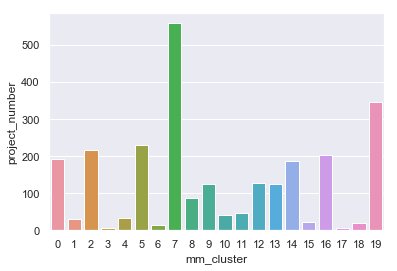

In [24]:
# projects per cluster
sns.barplot(x="mm_cluster", y="project_number", data=kmm_proj)

Let's check stability of clusters by looking at how mean wap prices vary across clusters for every launch year.

We will compute Spearman's Rank Correlation to check for monotonic relations for the mean prices across clusters for all years.

In [25]:
year_mm_price=df1.groupby(['launch_year','mm_cluster'])['wap'].mean()
year_mm_price=pd.DataFrame(year_mm_price)

mean_wap_by_year=pd.concat([year_mm_price.loc[(2014)],year_mm_price.loc[(2015)],year_mm_price.loc[(2016)],year_mm_price.loc[(2017)],year_mm_price.loc[(2018)]],axis=1)
mean_wap_by_year.columns=['meanwap_2014','meanwap_2015','meanwap_2016','meanwap_2017','meanwap_2018']
mean_wap_by_year

meanwap_2014  meanwap_2015  meanwap_2016  meanwap_2017  \
mm_cluster                                                           
0            4461.157143   4607.763853   4907.938194   5429.623377   
1           29000.000000  31921.800000  32120.569167  30106.800000   
2           14098.454837  14831.488343  14715.145918  15174.651398   
3           36130.666667  37999.500000  55858.000000           NaN   
4           25540.571429  24137.198489  26291.311667  22824.759933   
5            9485.603483  11429.214727   9672.252469   9846.522545   
6           41070.750000  52483.166667  64374.666667  15714.000000   
7            2984.480692   3023.583100   3159.066072   3250.648610   
8           18810.414848  18559.228895  20928.727273  24918.370369   
9            7241.750000   7190.230312   6923.446786   7284.184616   
10          35808.407242  42769.880344  38872.774000  35593.090909   
11          28082.162960  26854.000000  28538.773155  27601.714286   
12          12218.709031  13146.632946  12832.710219  13602.809310   
13          18112.103745  17384.851852  17553.483153  17890.197668   
14          15442.331257  16442.129733  17007.092950  16575.809007   
15          34678.250000  34907.799386  33380.333333  32685.333333   
16           4103.807960   4034.626387   4166.287660   4653.439452   
17                   NaN  35000.000000  33000.000000  27220.483133   
18           9100.000000   9265.000000   9033.200000   9276.500000   
19           5245.697588   5253.664460   5337.699442   5756.918935   

            meanwap_2018  
mm_cluster                
0            5805.102328  
1                    NaN  
2           15406.955109  
3                    NaN  
4           26730.000000  
5           11802.490393  
6                    NaN  
7            3179.228021  
8           22168.930147  
9            8434.699402  
10                   NaN  
11                   NaN  
12          13159.716423  
13          17814.555000  
14          16303.168677  
15                   NaN  
16           4005.434851  
17          29757.626415  
18                   NaN  
19           8158.254843

In [26]:
from scipy.stats import spearmanr

rho, pval = spearmanr(mean_wap_by_year,nan_policy='omit') # rho - correlation coefficient, p-value - signifies monotonic relationship
rho = pd.DataFrame(rho)
rho.index=['meanwap_2014','meanwap_2015','meanwap_2016','meanwap_2017','meanwap_2018']
rho.columns=['meanwap_2014','meanwap_2015','meanwap_2016','meanwap_2017','meanwap_2018']
rho

meanwap_2014  meanwap_2015  meanwap_2016  meanwap_2017  \
meanwap_2014      1.000000      0.998246      1.000000      0.923633   
meanwap_2015      0.998246      1.000000      0.996992      0.908772   
meanwap_2016      1.000000      0.996992      1.000000      0.914035   
meanwap_2017      0.923633      0.908772      0.914035      1.000000   
meanwap_2018      1.000000      1.000000      1.000000      0.994505   

              meanwap_2018  
meanwap_2014      1.000000  
meanwap_2015      1.000000  
meanwap_2016      1.000000  
meanwap_2017      0.994505  
meanwap_2018      1.000000

Given the high value of Spearman's Rank Correlation coefficients, there's a strong monotonic relation between mean wap prices
across clusters throughout various years. The clusters are indeed stable.

In [27]:
#Number of micromarkets in each cluster
kmm_micro=mm_proj.groupby('mm_cluster')['micro_market_number'].count().reset_index()
kmm_micro=pd.DataFrame(kmm_micro)
kmm_micro

mm_cluster  micro_market_number
0            0                    9
1            1                    3
2            2                    9
3            3                    2
4            4                    3
5            5                    4
6            6                    2
7            7                   23
8            8                    5
9            9                    6
10          10                    3
11          11                    5
12          12                    6
13          13                    4
14          14                    6
15          15                    2
16          16                    9
17          17                    2
18          18                    4
19          19                    6

In [28]:
# Visual representation of number of micromarkets in each cluster
sns.barplot(x="mm_cluster", y="micro_market_number", data=kmm_micro)

Note that the initial centroids of kmeans algorithms are not same every time the algorithm is run. Therefore, the micromarket frequency counts for each cluster will be different every time this notebook is run.

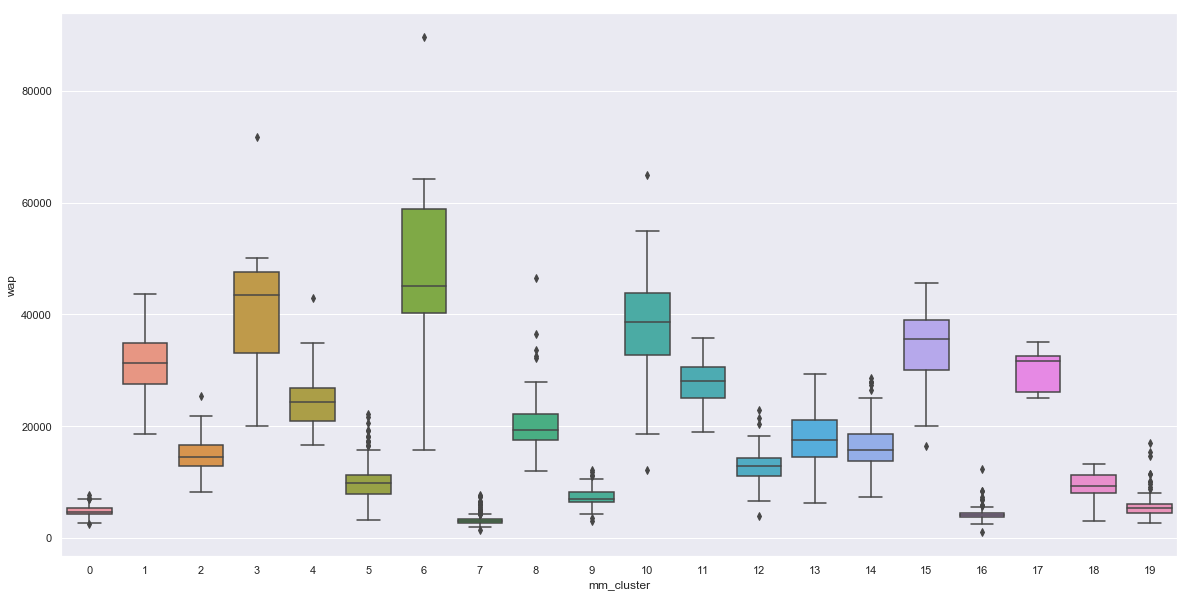

In [29]:
# wap against different clusters
f, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x="mm_cluster", y="wap", data=df1)

Micromarket clustering explains the variation in weighted average prices well. Micromarket clusters is thus a good predictor for wap. 

In [30]:
sns.catplot(x="mm_cluster", y="wap", col="zone", col_wrap=2, data=df1, kind="strip", height=5, aspect=1.1, palette='Set2')

Stripplots also show frequency counts of a class of a categorical data apart from showing how a continous target variable's tendency of centrality and variance on it.

In [31]:
sns.catplot(x="mm_cluster", y="wap", col="proj_bedrooms_clean",col_wrap=2, data=df1, kind="strip", height=5, aspect=1.4, palette='Set2')

Projects with greater number of bedrooms are pricier across all micromarkets. However, such projects have low frequency.

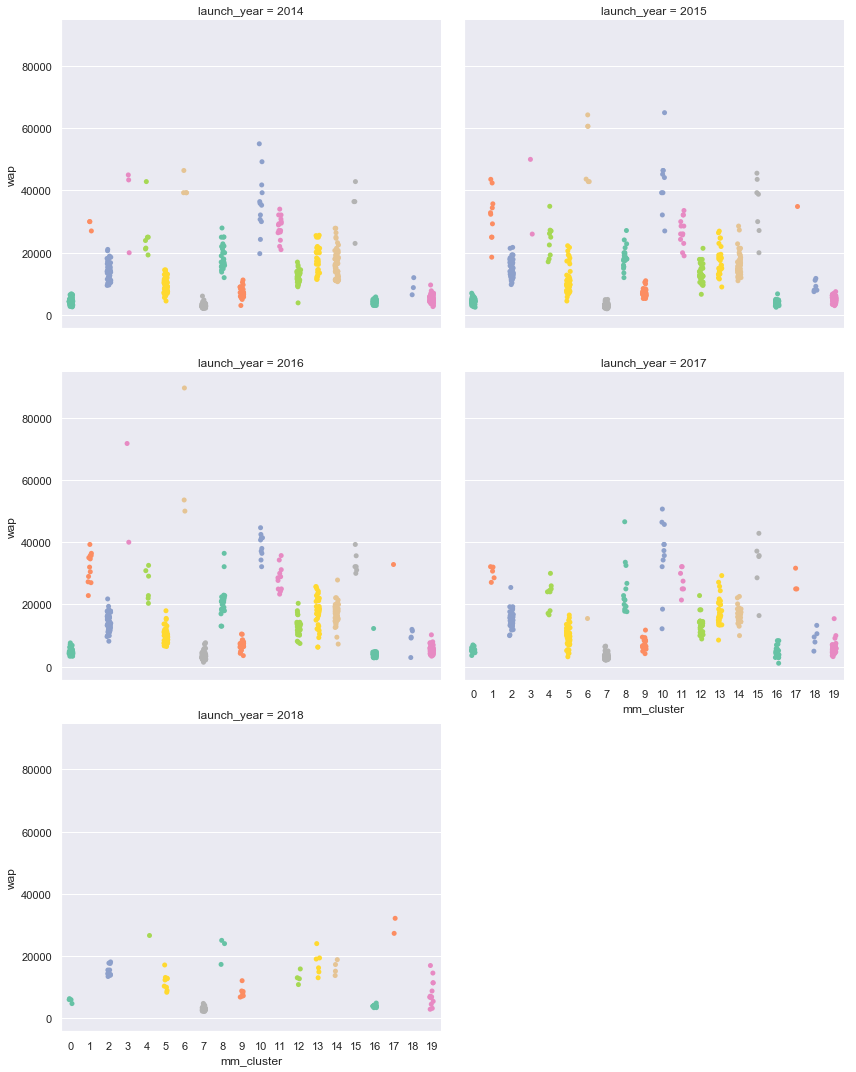

In [32]:
sns.catplot(x="mm_cluster", y="wap", col="launch_year", data=df1, col_wrap=2, kind="strip", height=5, aspect=1.2, palette='Set2')

Prices are time invariant for different clusters of micromarkets. Prices tend to decrease over time across all micromarket clusters.

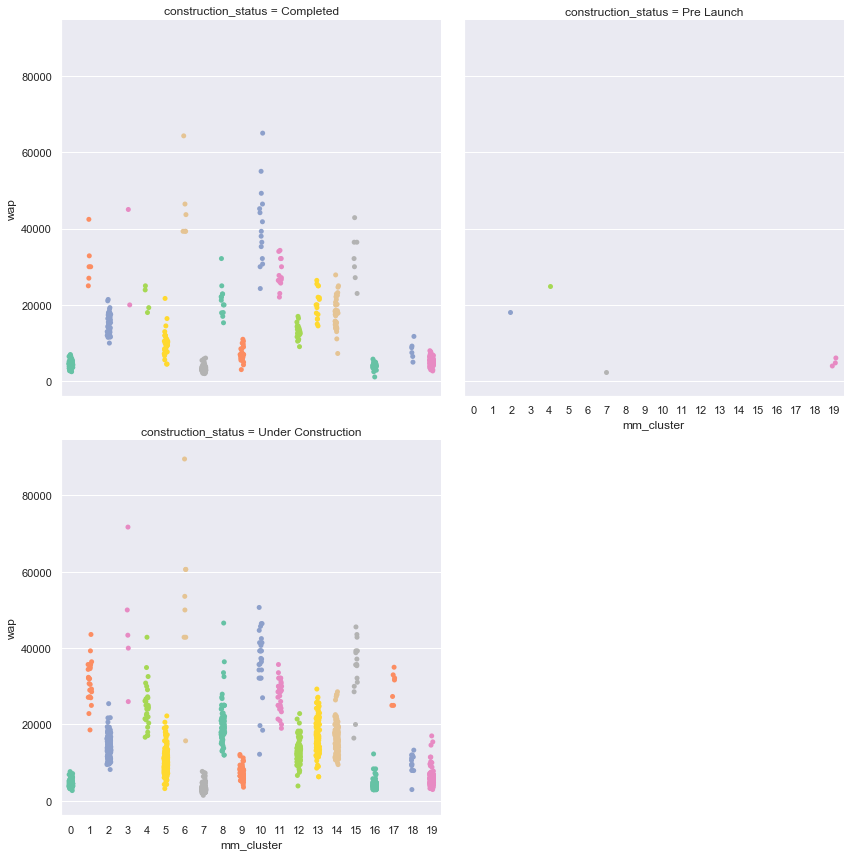

In [33]:
sns.catplot(x="mm_cluster", y="wap", col="construction_status",col_wrap=2, data=df1, kind="strip", height=6, aspect=1, palette='Set2')

Clustering of micromarkets indeed explains price variations significantly. Significant variations of prices are visible across zones and different segments of other categorical variables as well.  Since clustering/grouping of micromarkets was done based on mean prices, this shows that prices are also strongly influenced by other factors.

## 2.2 Exploratory Data Analysis for Wap Against Different Possible Predictor Variables

### 2.2.1 Contingency Tables of Categorical Variables


Let us begin by looking at frequency distributions of micromarket clusters and several categorical features. 
We begin with crosstab tables involving unit-type, project bedrooms and construction status.

In [34]:
sns.heatmap(pd.crosstab(df1['construction_status'],df1['unit_type']),annot=True, fmt='d',cmap='gist_gray')

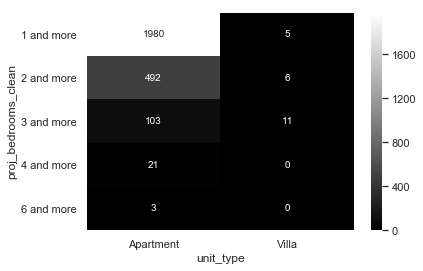

In [35]:
sns.heatmap(pd.crosstab(df1['proj_bedrooms_clean'], df1['unit_type']),annot=True, fmt='d',cmap='gist_gray')

Number of apartments overshadow that of villas. Most of the projects are already understruction and consist of 1 and 2 bedrooms.

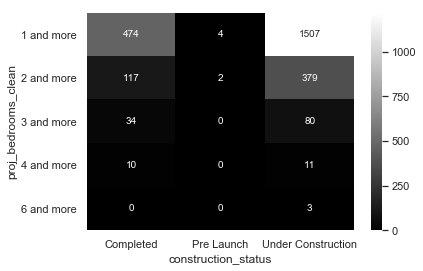

In [36]:
sns.heatmap(pd.crosstab(df1['proj_bedrooms_clean'],df1['construction_status']),annot=True, fmt='d',cmap='gist_gray',robust=True)

Now, let us look at frequency distributions of micromarket clusters across unit-types, number of project bedrooms and construction status of projects.

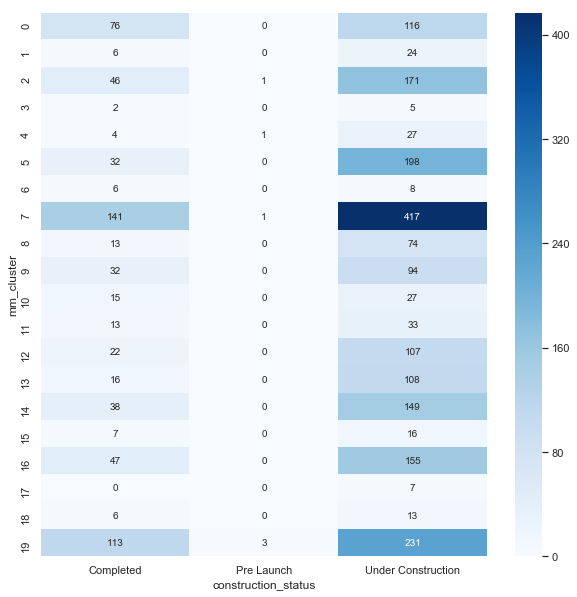

In [37]:
fig,ax=plt.subplots(figsize=(10,10))
fig=sns.heatmap(pd.crosstab(df1['mm_cluster'],df1['construction_status']),annot=True, fmt='d',cmap='Blues')

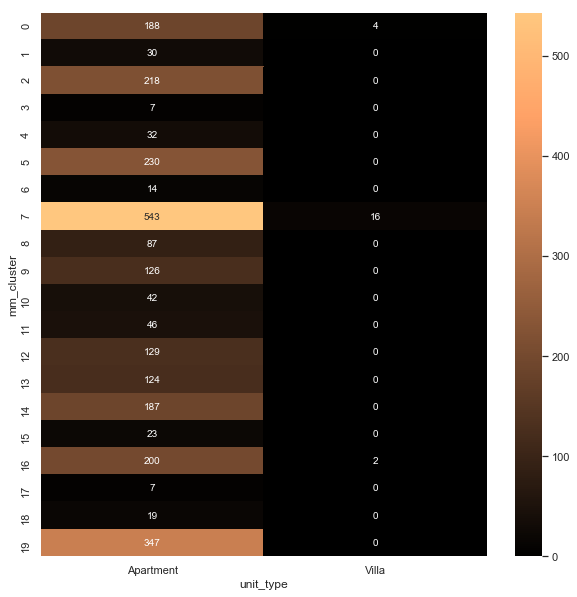

In [38]:
fig,ax=plt.subplots(figsize=(10,10))
fig=sns.heatmap(pd.crosstab(df1['mm_cluster'],df1['unit_type']),annot=True, fmt='d',cmap='copper')

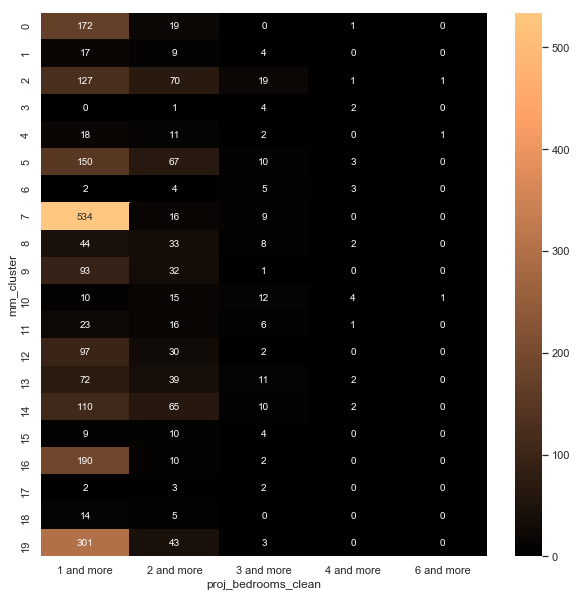

In [39]:
fig,ax=plt.subplots(figsize=(10,10))
fig=sns.heatmap(pd.crosstab(df1['mm_cluster'],df1['proj_bedrooms_clean']),annot=True, fmt='d',cmap='copper')

Micromarket frequencies are not evenly distributed across all categories of unit-type, project bedrooms and construction.

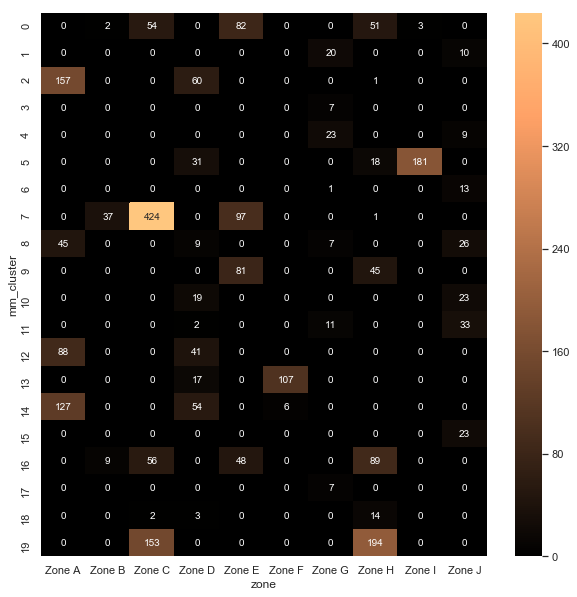

In [40]:
fig,ax=plt.subplots(figsize=(10,10))
fig=sns.heatmap(pd.crosstab(df1['mm_cluster'],df1['zone']),annot=True, fmt='d',cmap='copper')

### 2.2.2 How Prices of Different Segments of Categorical Variables Vary Across Zones

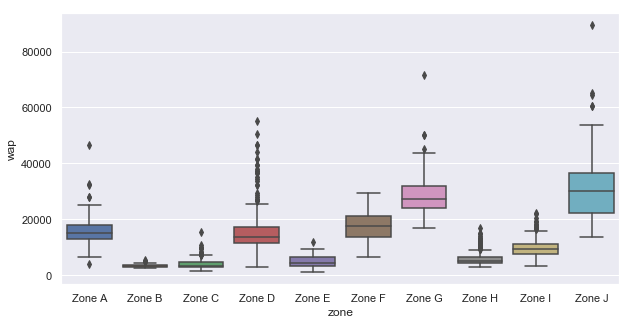

In [41]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="zone", y="wap",data=df1)

As shown just now, wap varies significant among different zones. Zone J is the costliest area due to highest mean price. Zone B is cheapest.

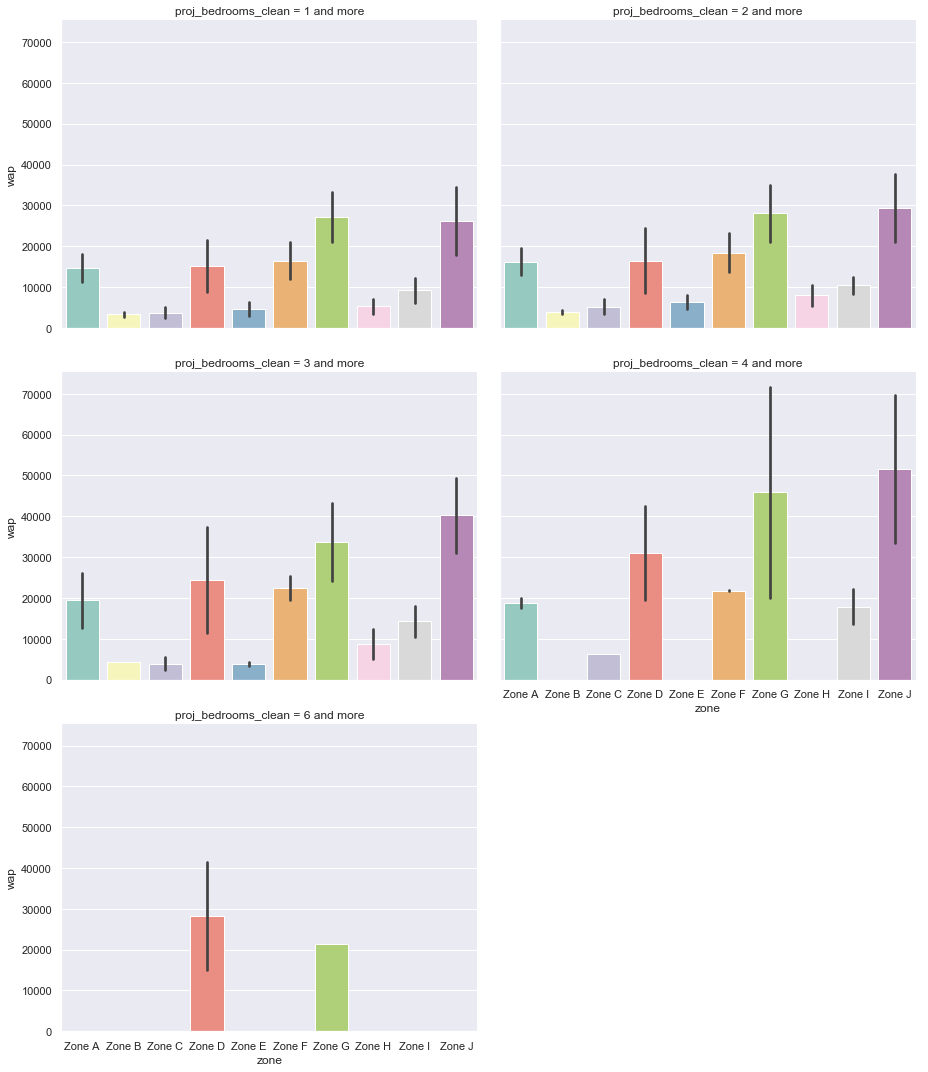

In [42]:
sns.catplot(x="zone", y="wap", col="proj_bedrooms_clean",col_wrap=2,data=df1, kind="bar", height=5, aspect=1.3, palette='Set3',ci='sd')

The barplots show mean prices while the error bar depicts variation in prices.

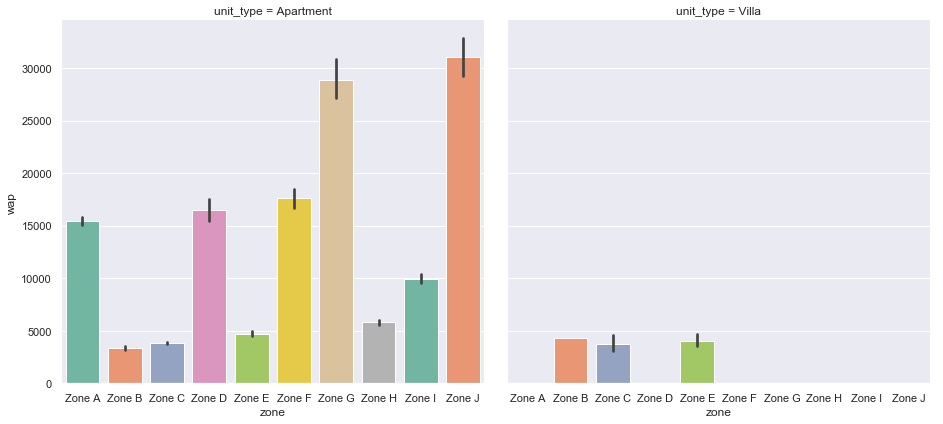

In [43]:
sns.catplot(x="zone", y="wap", col="unit_type",col_wrap=2, data=df1, kind="bar", height=6, aspect=1.1, palette='Set2')

Villas have far fewer occurences compared to apartments as most people are not wealthy enough to afford a villa. Villas do not occur in all zones. 

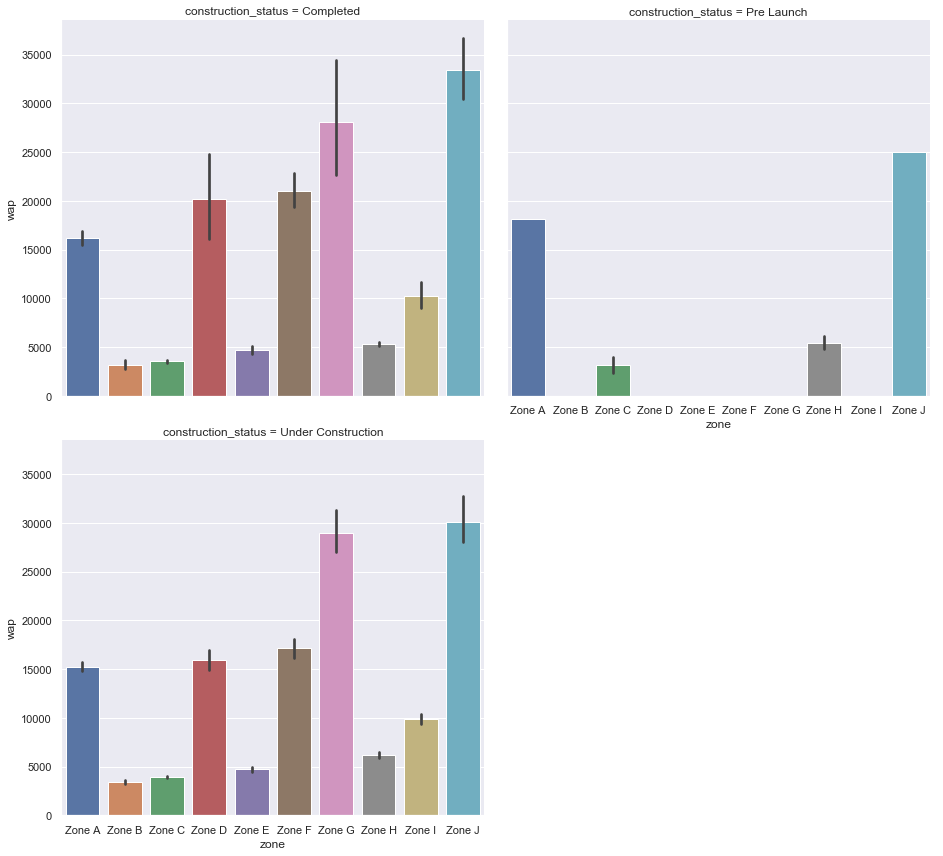

In [44]:
sns.catplot(x="zone", y="wap", col="construction_status",col_wrap=2,data=df1, kind="bar", height=6, aspect=1.1)

Prices varies with project bedroom numbers, unit-types and construction status differently across different years.

###  2.2.3 How Prices of Different Segments of Categorical Variables Vary Over Years

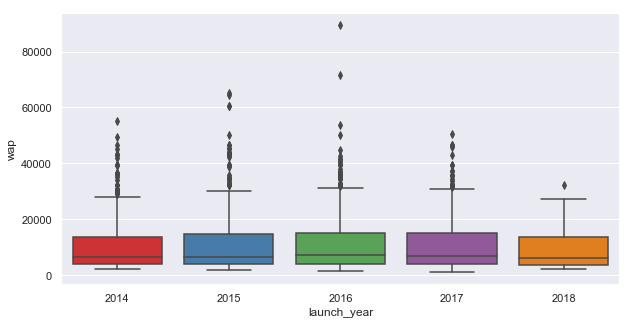

In [45]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="launch_year", y="wap", data=df1,palette='Set1')

Prices are definitely not time invariant. Let's observe how they vary with time across different segments of categorical variables. 

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars. We are using pointplots to analyse how prices vary across years for different categories of some predictor variables.

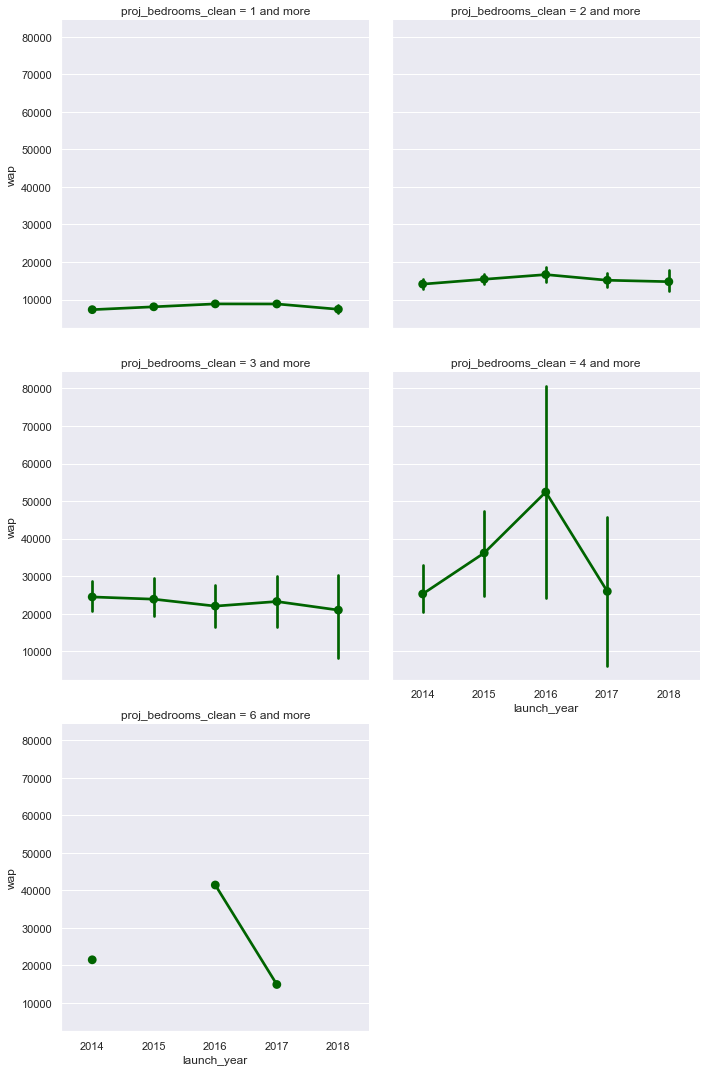

In [46]:
sns.catplot(x="launch_year", y="wap", col="proj_bedrooms_clean",col_wrap=2, data=df1, kind="point", height=5, aspect=1, color='darkgreen')

Generally, the greater the number of bedrooms, the pricier an apartment is. Prices declined over time in spite of temporary spike. 

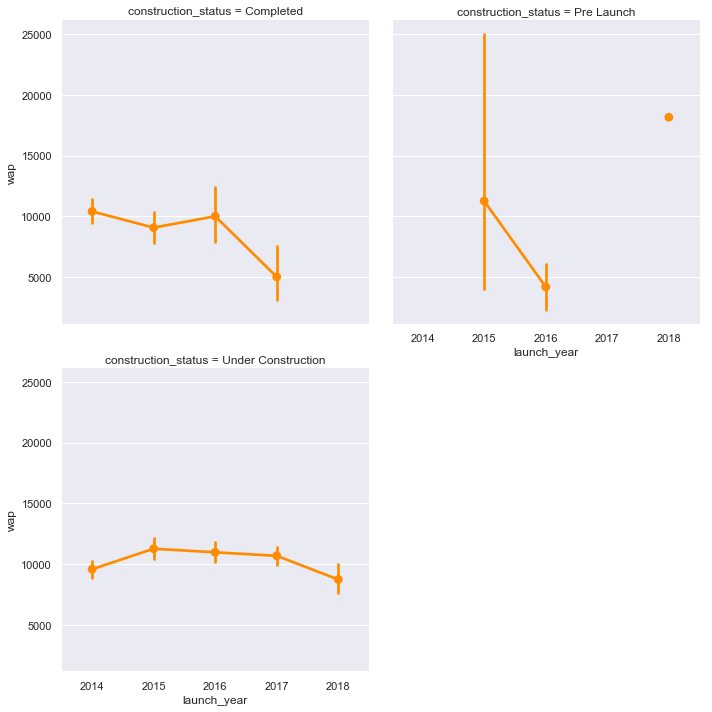

In [47]:
sns.catplot(x="launch_year", y="wap", col="construction_status",col_wrap=2, data=df1, kind="point", height=5, aspect=1, color='darkorange')

Projects that commenced earlier have definitely completed earlier. Very few projects are under pre-launch at the time of analysis.


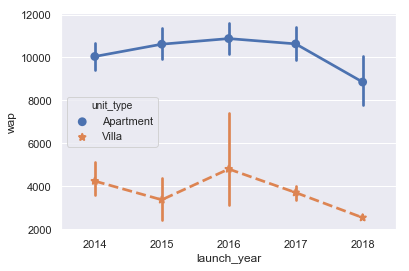

In [48]:
sns.pointplot(x="launch_year", y="wap", hue="unit_type",data=df1, markers=["o",'*'], linestyles=["-",'--'])

Unit type definitely influences prices.

General trend is that prices decrease over time for all categories of a categorical feature. An exception is the pre-launch project prices. This is probably because speculated prices before a project commences are subjected to changes by various market factors.

### 2.2.4 EDA Involving Prices Against Categorical Variables Across Different Segments of Other Categorical Variables

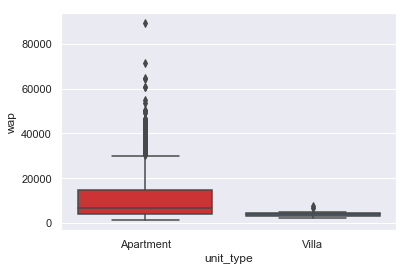

In [49]:
sns.boxplot(x="unit_type", y="wap", data=df1, palette='Set1')

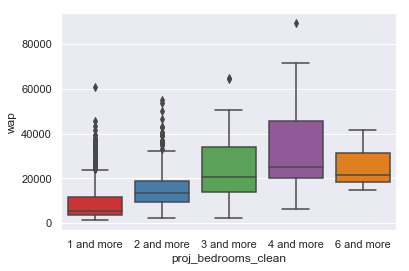

In [50]:
sns.boxplot(x="proj_bedrooms_clean", y="wap", data=df1, palette='Set1')

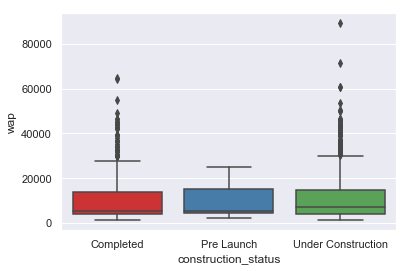

In [51]:
sns.boxplot(x="construction_status", y="wap", data=df1, palette='Set1')

Compared to project bedrooms and unit types, construction status seem to contribute to least variance of prices within interquartile range across its different categories.

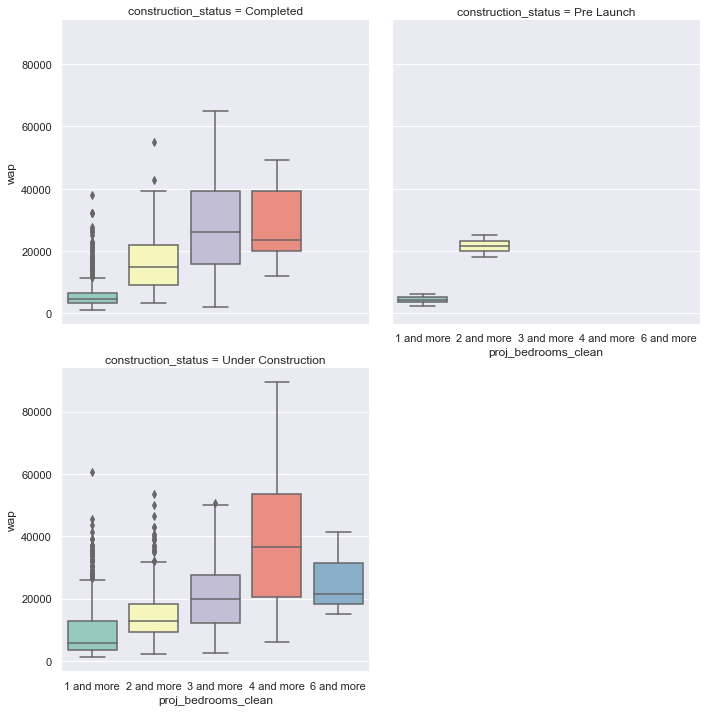

In [52]:
sns.catplot(x="proj_bedrooms_clean", y="wap", col="construction_status",col_wrap=2, data=df1, kind="box", height=5, aspect=1, palette='Set3')

Flats under construction - those with 4 bedrooms are costliest.
Completed flats- those with 3 bedrooms are costliest.

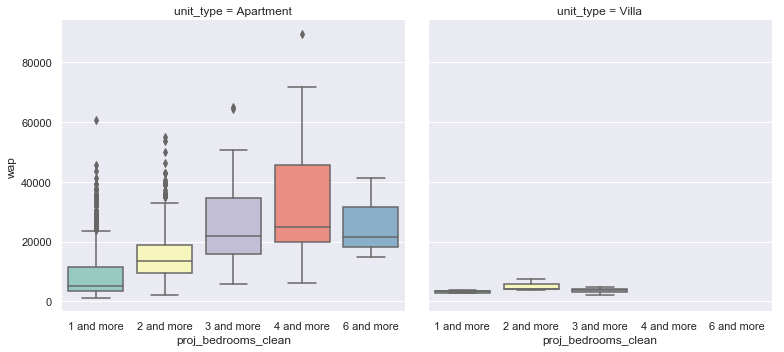

In [53]:
sns.catplot(x="proj_bedrooms_clean", y="wap", col="unit_type",col_wrap=2, data=df1, kind="box", height=5, aspect=1.1, palette='Set3')

Apartments- 4 bedrooms and more are costliest. Those with one bedrooms least expensive.
Villa- Largely sparse. 2 bedrooms and more units are costlier. Those with one bedrooms least expensive.

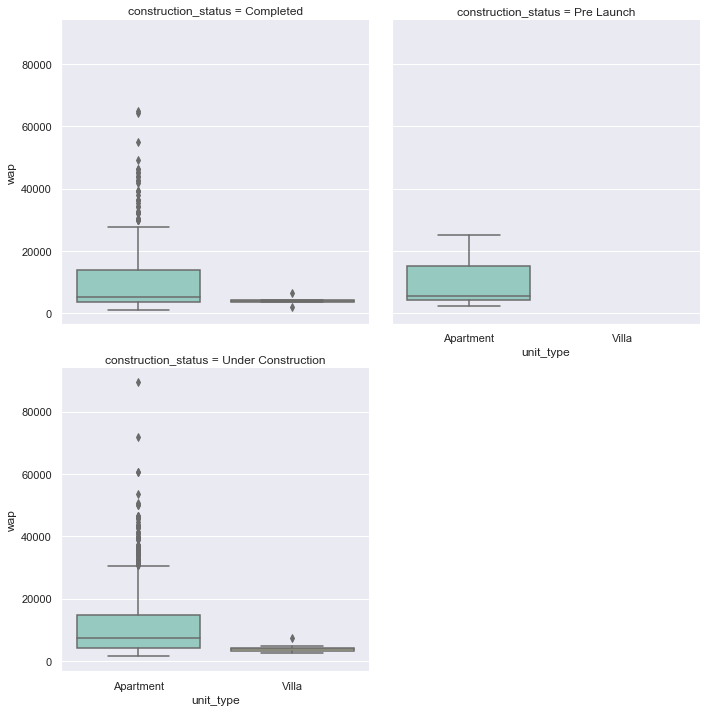

In [54]:
sns.catplot(x="unit_type", y="wap", col="construction_status",col_wrap=2, data=df1, kind="box", height=5, aspect=1, palette='Set3')

Apartments show greater central tendency and variation in prices due to higher frequency counts and demand compared to villa whose individual unit is pricier as only economically elites can afford villas. 

### 2.2.5 EDA Involving Prices Against Continous Variables Across Different Segments of Categorical Variables

Now, let's look at how maxsize and minsize varies with wap across different segments of various categorical variables.

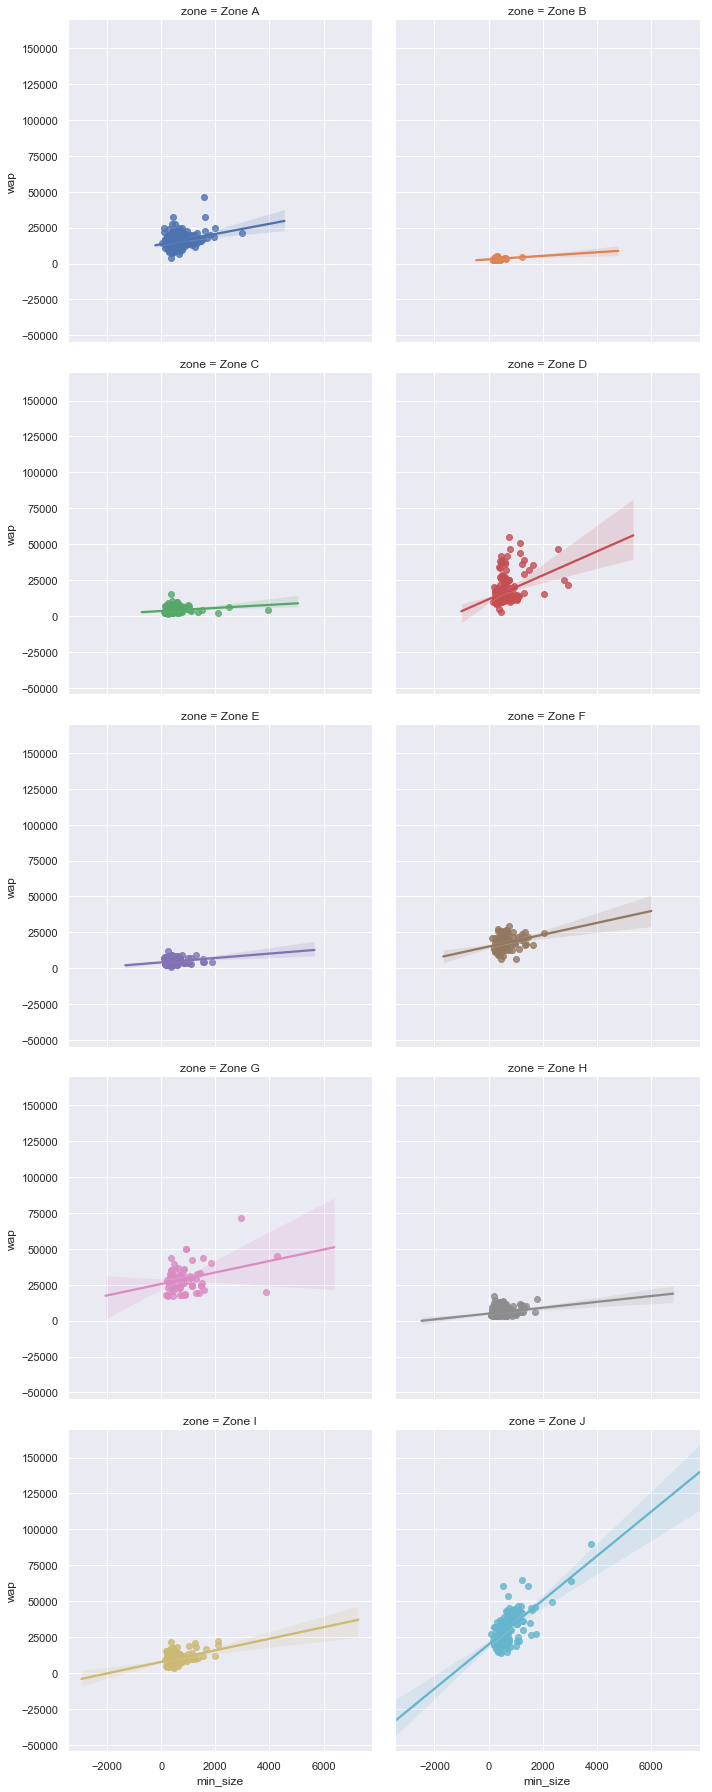

In [55]:
sns.lmplot(x="min_size", y="wap",col='zone',hue='zone',col_wrap=2, height=5, aspect=1, data=df1)

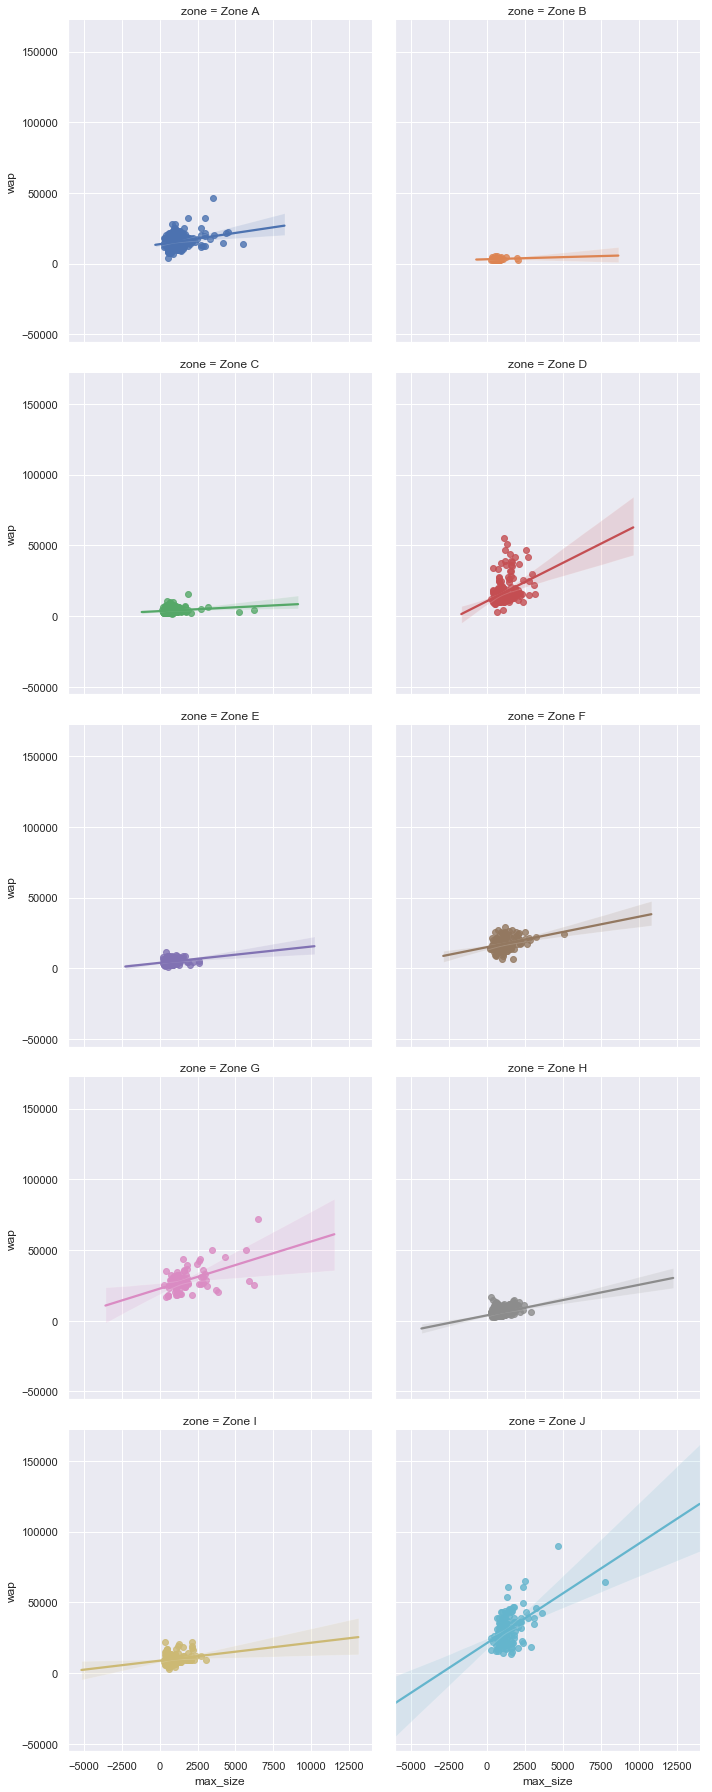

In [56]:
sns.lmplot(x="max_size", y="wap",col='zone',hue='zone',col_wrap=2, height=5, aspect=1, data=df1)

For different zones, variations in correlation between prices and min_size, as well as prices and max_size. Many of the predictor variables are strongly correlated with zone.

Strong multicollinearity between min_size and max_size suspected.

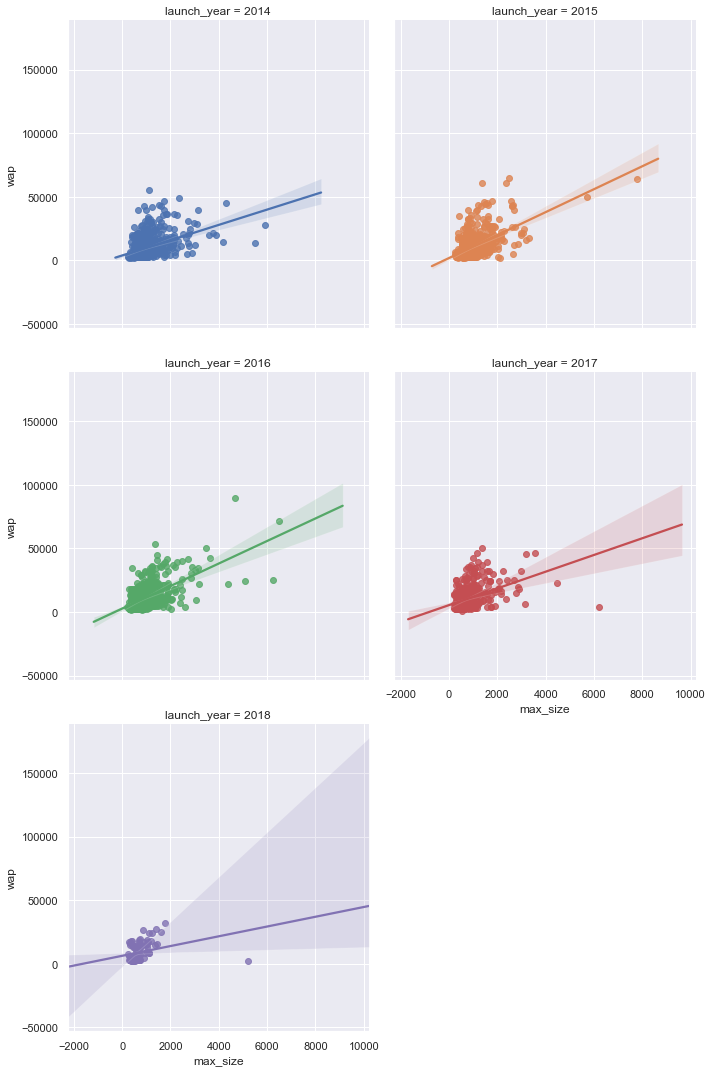

In [57]:
sns.lmplot(x="max_size", y="wap",col='launch_year',hue='launch_year',col_wrap=2, height=5, aspect=1, data=df1)

Max_size varies across years. It's sharpest increase is recorded in 2016.

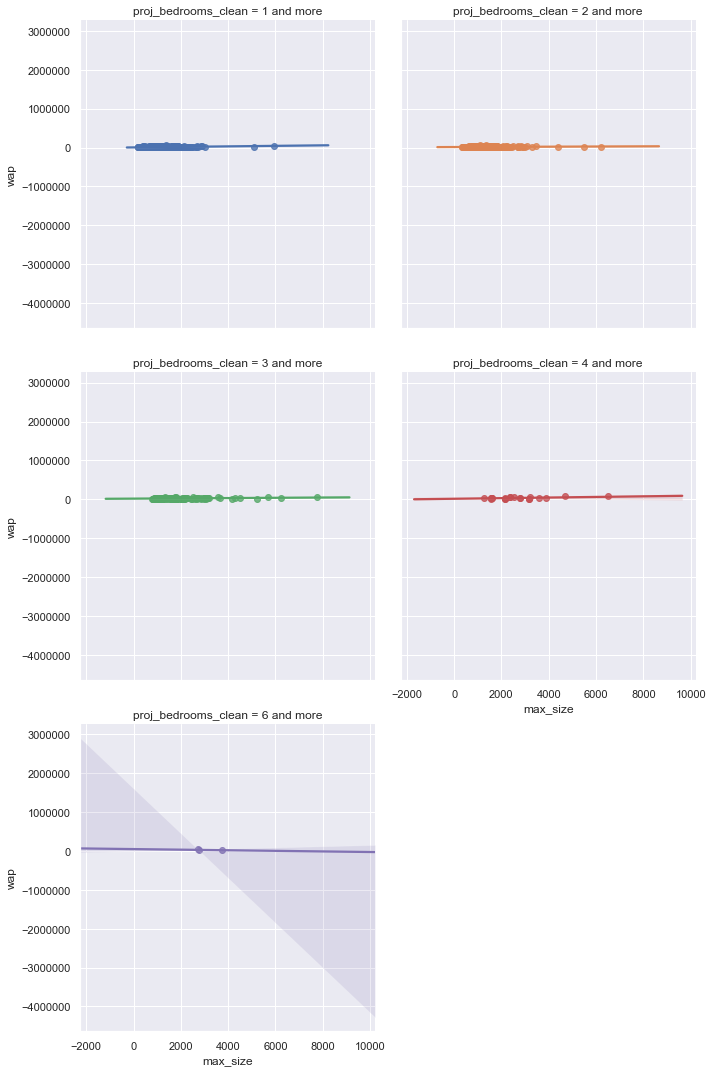

In [58]:
sns.lmplot(x="max_size", y="wap",col='proj_bedrooms_clean',hue='proj_bedrooms_clean',col_wrap=2, height=5, aspect=1,data=df1)

Prices are invariant for all maximum sizes regardless of number of bedrooms. 

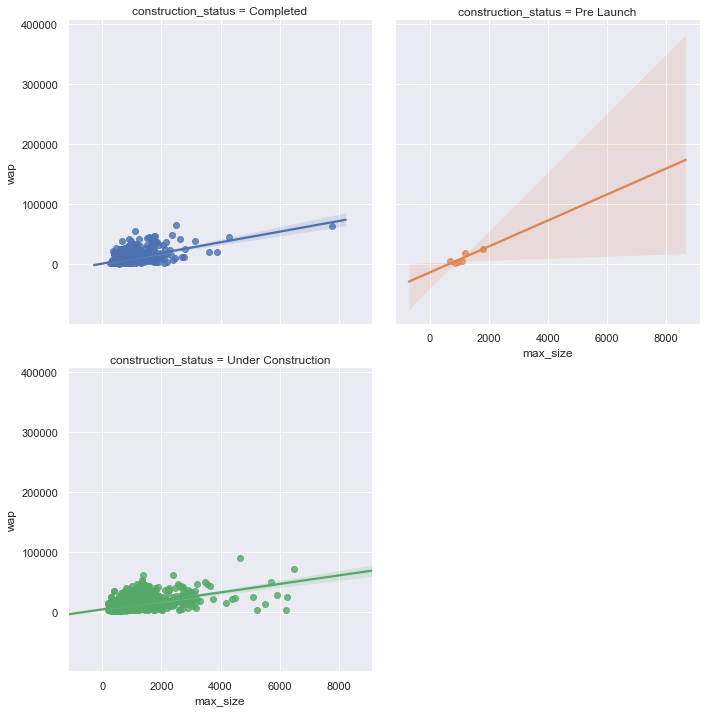

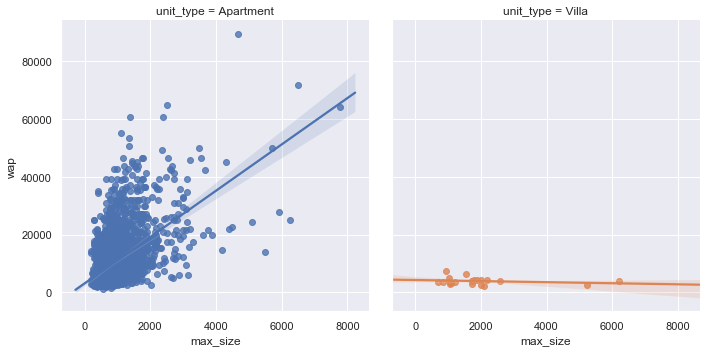

In [59]:
sns.lmplot(x="max_size", y="wap",col='construction_status',hue='construction_status',col_wrap=2, height=5,aspect=1, data=df1)
sns.lmplot(x="max_size", y="wap",col='unit_type',hue='unit_type',col_wrap=2, height=5, aspect=1,data=df1)

Unit type and construction status across maximum sizes of projects also influence prices.

Max_size not affected by proj_bedrooms_clean as it seems.

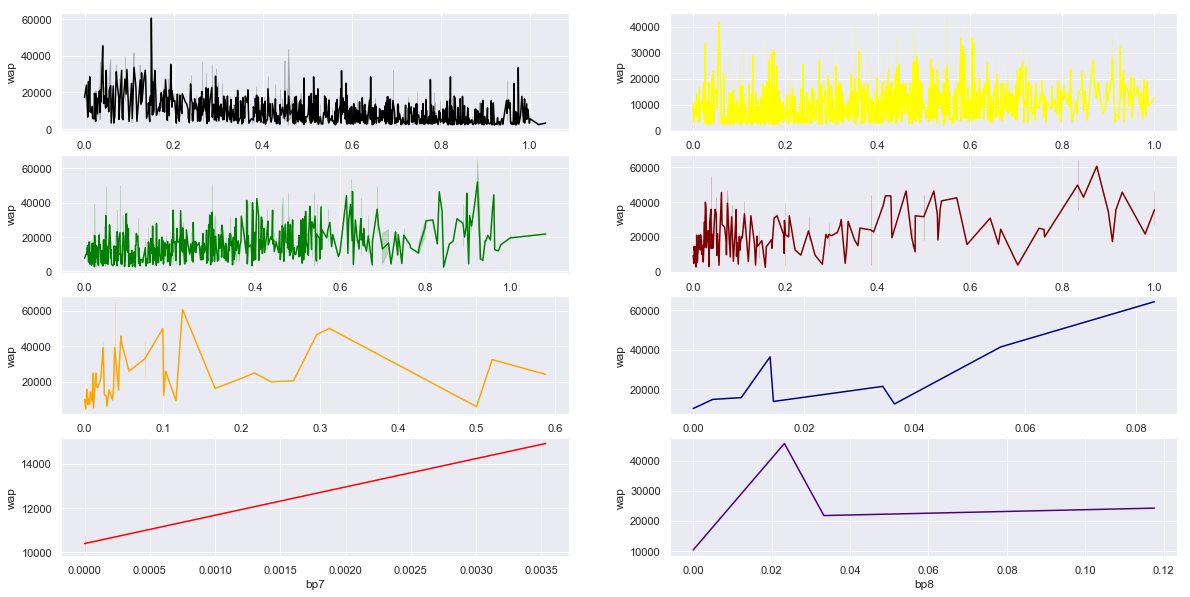

In [60]:
# Line plots involving prices against bedroom by typology
f, ax = plt.subplots(4,2 ,figsize=(20,10))
sns.lineplot(x="bp1", y='wap', data=df1, color="black",ax=ax[0,0])
sns.lineplot(x="bp2", y='wap', data=df1, color="yellow",ax=ax[0,1])
sns.lineplot(x="bp3", y='wap', data=df1, color="green",ax=ax[1,0])
sns.lineplot(x="bp4", y='wap', data=df1, color="maroon",ax=ax[1,1])
sns.lineplot(x="bp5", y='wap', data=df1, color="orange",ax=ax[2,0])
sns.lineplot(x="bp6", y='wap', data=df1, color="darkblue",ax=ax[2,1])
sns.lineplot(x="bp7", y='wap', data=df1, color="red",ax=ax[3,0])
sns.lineplot(x="bp8", y='wap', data=df1, color="indigo",ax=ax[3,1])

Except for bp1, increasing trend between prices and bedrooms by typology per project. This is because number of bedrooms in an unit influences price. Figures portray noisy data due to sparsity of columns.

## 2.3 Feature Selection Test / Analysis

### 2.3.1 Feature Selection For Categorical Predictor Variables

In [61]:
# Split up wap into intervals
df1['wap_interval'] = pd.cut(df1['wap'], bins=[0,5e+3,1e+4,3e+4,9e+4]) 
df1['wap_interval'].value_counts()

(0.0, 5000.0]         1017
(10000.0, 30000.0]     927
(5000.0, 10000.0]      565
(30000.0, 90000.0]     112
Name: wap_interval, dtype: int64

In [62]:
from scipy.stats import chi2_contingency

print("-----P-Values of two-way Chi-Square Test involving categorical predictors-----")
for i in ['construction_status','unit_type','proj_bedrooms_clean','launch_year','mm_cluster','zone']:
    cont=pd.crosstab(df1['wap_interval'],df1[i]) #Contingency table
    g, p, dof, expctd = chi2_contingency(cont)
    print(i,": ", p)

-----P-Values of two-way Chi-Square Test involving categorical predictors-----
construction_status :  1.1780529837133837e-05
unit_type :  9.917379872277916e-06
proj_bedrooms_clean :  9.273133094395507e-141
launch_year :  0.12845156266274824
mm_cluster :  0.0
zone :  0.0


### 2.3.2 Feature Selection For Continuous Predictor Variables

Based on inferences from clustermap, certain pairs of variables are not advised to be used simultaneously in regression:

1) max_size and min_size

2) bp6 and bp7

3) bp5 and bp8

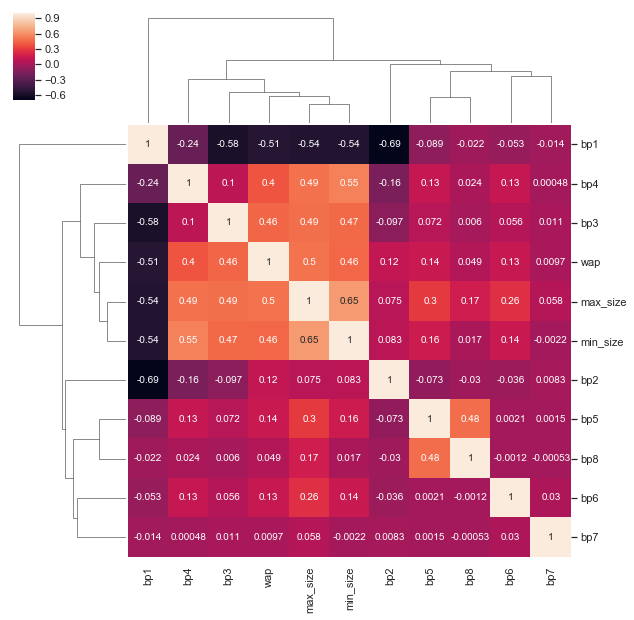

In [63]:
# Dendogram Linkage between continuous variables showing links based on correlation coefficients
include=['wap','max_size','min_size','bp1','bp2','bp3','bp4','bp5','bp6','bp7','bp8'] 
sns.clustermap(pd.DataFrame(df1[include]).corr(),annot=True, method='complete')# Complete linkage used for cluster analysis

It's desirable to have low correlations among independent variables.

Max_size and min_size should not be used simultaneously to avoid collinearity in regression model. Let's choose max_size instead first.

In [64]:
from sklearn.feature_selection import mutual_info_regression

print("-----P-Values of Mutual Information Regression Test involving continuous predictors-----")
for i in ['min_size','max_size','bp1','bp2','bp3','bp4','bp5','bp6','bp7','bp8']:
    com=df1[i].values
    com=com.reshape(-1,1)
    mi=mutual_info_regression(com, df1['wap'])
    print(i,": ", mi)

-----P-Values of Mutual Information Regression Test involving continuous predictors-----
min_size :  [0.24291053]
max_size :  [0.28635959]
bp1 :  [0.27264558]
bp2 :  [0.14976876]
bp3 :  [0.1861531]
bp4 :  [0.07980545]
bp5 :  [0.01702406]
bp6 :  [0.01146567]
bp7 :  [0.00646176]
bp8 :  [0.00233936]


The mutual information score of two random variables is a measure of the mutual dependence between the two variables. The higher the value of that score, the higher the dependency.

More information on mutual information on mutual information found here:
http://www.scholarpedia.org/article/Mutual_information

The continuous variables to be chosen are max_size, bp1, bp2 and bp3. 

## 3. Base Model of Log-Transformed Wap

### 3.1 Base Model Selection


Let's fit all the categorical features discussed so far and the 4 selected numerical features into a linear regression model. Try with log-transformed price as dependent variable first. Log-transformation is known to minimise skewness and ensure normality in residual distribution.

In [65]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula='log_wap ~ max_size + C(mm_cluster) + bp1 + bp2 + bp3 + C(launch_year) + C(unit_type) + C(proj_bedrooms_clean) + C(construction_status) + C(zone)', data=df1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_wap   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     733.2
Date:                Sat, 23 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:08:18   Log-Likelihood:                 328.63
No. Observations:                2621   AIC:                            -569.3
Df Residuals:                    2577   BIC:                            -310.9
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Let's try cutting down number of categorical features and see if the adjusted R-squared values change or not. 
Construction status contributed least variance over prices. Drop it.
Drop zone as well as clustered micromarkets are defined by zones as we have seen earlier.

In [66]:
mod1 = smf.ols(formula='log_wap ~ max_size + C(mm_cluster) + bp1 + bp2 + bp3 + C(launch_year) + C(unit_type) + C(proj_bedrooms_clean)', data=df1).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                log_wap   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     976.4
Date:                Sat, 23 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:08:18   Log-Likelihood:                 312.53
No. Observations:                2621   AIC:                            -559.1
Df Residuals:                    2588   BIC:                            -365.3
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


We observe that no deterioration in adjusted R-square value.

In [67]:
mod = smf.ols(formula='wap ~ max_size + C(mm_cluster) + bp1 + bp2 + bp3 + C(launch_year) + C(unit_type) + C(proj_bedrooms_clean)', data=df1).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                    wap   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     649.2
Date:                Sat, 23 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:08:18   Log-Likelihood:                -24726.
No. Observations:                2621   AIC:                         4.952e+04
Df Residuals:                    2588   BIC:                         4.971e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


The standard errors are larger and the adjusted R-squared value is lower, suggesting greater degree of residuals. 

In [68]:
def residual_log (model, dataframe, residual_log, residual):
    # Function To Compute and return residual summary statistics for a model
    predicted_lwap = model.predict()
    predicted_wap=np.exp(predicted_lwap)
    dataframe[residual_log]=dataframe['log_wap'] - predicted_lwap
    dataframe[residual]=dataframe['wap'] - predicted_wap
    return (dataframe[residual_log].describe(), print('median:  ',dataframe[residual_log].median()))

In [69]:
def percentage_error_projects (dataframe, residual, percentage_error,percentage_error_interval):
    #Calculate percentage error w.r.t wap
    dataframe[percentage_error]=(dataframe[residual]/dataframe['wap'])*100
    #Split percentage error into equal intervals
    dataframe[percentage_error_interval] = pd.cut(dataframe[percentage_error], bins=[-float("inf"),-30,-20,-10,0,10,20,30,float("inf")])
    # How many projects in each interval of wap?
    grouped_df = dataframe.groupby(percentage_error_interval)['project_number'].count().reset_index()
    # Percentage of projects under each interval
    grouped_df['percentage_projects']=(grouped_df['project_number']/grouped_df['project_number'].sum())*100
    return (grouped_df)    

In [70]:
residual_log (mod1, df1, 'residual_log','residual') # Residual statistics for log-transformed proposed base model

median:   0.0047358063541640405


(count    2.621000e+03
 mean     1.208984e-12
 std      2.148125e-01
 min     -1.286429e+00
 25%     -1.215238e-01
 50%      4.735806e-03
 75%      1.203200e-01
 max      1.137013e+00
 Name: residual_log, dtype: float64, None)

In [71]:
pred_lwap = mod1.predict() #Predicted values of log-transformed wap
pred_wap=np.exp(pred_lwap) #Predicted log-transformed wap values transformed into absolute values

#Include values for predicted values of wap and log-wap derived from base model with log-transformation into dataframe
pred_lwap=pd.DataFrame(pred_lwap)
pred_wap=pd.DataFrame(pred_wap)
pred_lwap.columns=['pred_lwap']
pred_wap.columns=['pred_wap']

df1=pd.concat([df1,pred_lwap,pred_wap],axis=1)
df1.head()

zone micro_market_number developer_number project_number         wap  \
0  Zone A                   1                1              1  14464.0000   
1  Zone A                   1                2              2  13982.0000   
2  Zone A                   1                2              3  13982.0000   
3  Zone A                   1                5              6  12857.0000   
4  Zone A                   1                7              8  16981.5758   

    log_wap proj_bedrooms_clean  unit_type  proj_launched_units launch_year  \
0  9.579418          1 and more  Apartment                  111        2015   
1  9.545526          2 and more  Apartment                  150        2014   
2  9.545526          2 and more  Apartment                  150        2014   
3  9.461644          1 and more  Apartment                  120        2016   
4  9.739884          1 and more  Apartment                   33        2015   

   ...  bp6  bp7  bp8  b48  mm_cluster        wap_interval  residual_log  \
0  ...  0.0  0.0  0.0    0          14  (10000.0, 30000.0]      0.034819   
1  ...  0.0  0.0  0.0    0          14  (10000.0, 30000.0]     -0.123578   
2  ...  0.0  0.0  0.0    0          14  (10000.0, 30000.0]     -0.123578   
3  ...  0.0  0.0  0.0    0          14  (10000.0, 30000.0]     -0.102890   
4  ...  0.0  0.0  0.0    0          14  (10000.0, 30000.0]      0.018676   

      residual  pred_lwap      pred_wap  
0   494.961899   9.544599  13969.038101  
1 -1839.169814   9.669104  15821.169814  
2 -1839.169814   9.669104  15821.169814  
3 -1393.305791   9.564534  14250.305791  
4   314.211281   9.721208  16667.364519  

[5 rows x 36 columns]

In [72]:
percentage_error_projects (df1, 'residual', 'percentage_error','percentage_error_interval')

percentage_error_interval  project_number  percentage_projects
0             (-inf, -30.0]             230             8.775277
1            (-30.0, -20.0]             202             7.706982
2            (-20.0, -10.0]             361            13.773369
3              (-10.0, 0.0]             489            18.657001
4               (0.0, 10.0]             608            23.197253
5              (10.0, 20.0]             434            16.558565
6              (20.0, 30.0]             187             7.134681
7               (30.0, inf]             110             4.196871

In [73]:
#Mean Absolute Percentage Error of log-transformed proposed base model
np.absolute(df1['percentage_error']).mean()

16.18528162440719

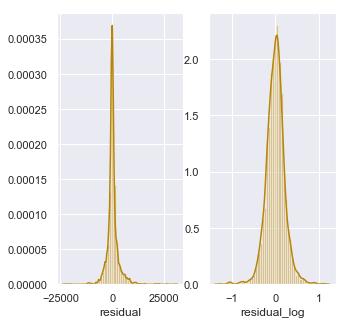

In [74]:
# Lets investigate normal distribution properties of log-transformed residual and absolute residuals of base model
f, ax = plt.subplots(1,2,figsize=(5,5))
sns.distplot(df1['residual'],color="y", ax=ax[0])
sns.distplot(df1['residual_log'],color="y",ax=ax[1])

In [75]:
print("Skewness of residual: %f" % df1['residual'].skew())
print("Kurtosis of residual: %f" % df1['residual'].kurt())
print("Skewness of residual_log: %f" % df1['residual_log'].skew())
print("Kurtosis of residual_log: %f" % df1['residual_log'].kurt())

Skewness of residual: 1.136947
Kurtosis of residual: 17.742522
Skewness of residual_log: -0.112933
Kurtosis of residual_log: 3.266833


Log-transformation reduces skewness and kurtosis of error distribution.

Let's look at the residual distribution of the first proposed base model with all the categorical features.

In [76]:
residual_log (model, df1, 'residual_log_model','residual_model') # Residual statistics for the first proposed base model

median:   -5.923919636607877e-05


(count    2.621000e+03
 mean     1.613648e-12
 std      2.134970e-01
 min     -1.301788e+00
 25%     -1.172057e-01
 50%     -5.923920e-05
 75%      1.171566e-01
 max      1.113741e+00
 Name: residual_log_model, dtype: float64, None)

In [77]:
percentage_error_projects (df1, 'residual_model', 'percentage_error_model','percentage_error_interval_model')

percentage_error_interval_model  project_number  percentage_projects
0                   (-inf, -30.0]             218             8.317436
1                  (-30.0, -20.0]             190             7.249142
2                  (-20.0, -10.0]             367            14.002289
3                    (-10.0, 0.0]             536            20.450210
4                     (0.0, 10.0]             597            22.777566
5                    (10.0, 20.0]             432            16.482259
6                    (20.0, 30.0]             166             6.333461
7                     (30.0, inf]             115             4.387638

In [78]:
#Mean Absolute Percentage Error of first proposed base model
np.absolute(df1['percentage_error_model']).mean()

15.952225288240093

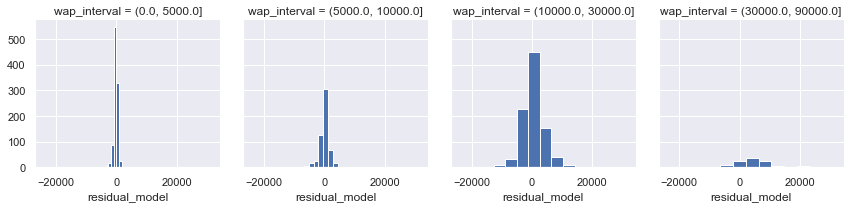

In [79]:
sns.FacetGrid(df1, col="wap_interval").map(plt.hist, "residual_model")

Smaller instances of prediction errors at higher prices.

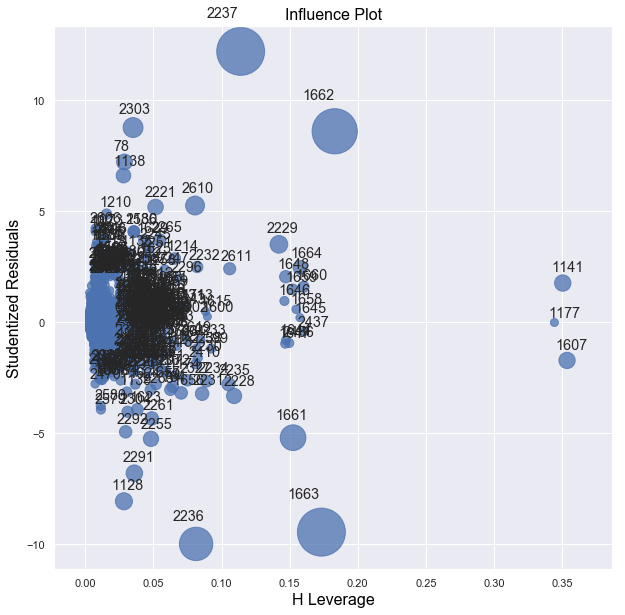

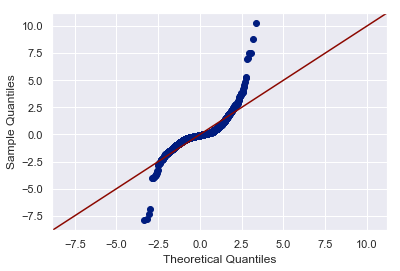

In [80]:
import scipy.stats as stats

fig,ax=plt.subplots(figsize=(10,10))
#Cook's Distance Plot for log transformed base model
fig=sm.graphics.influence_plot(mod, ax=ax, color='b')
#QQ Plot for absolute residual of log-transformed base model showing deviation from normal distribution
fig = sm.qqplot(df1['residual'], fit=True, line='45')
plt.show()

Cook's distance identifies outliers and leverage points in observations that shows their influence on regression model.
QQ normal plot of a quantity signifies how well it fits a normal distribution.

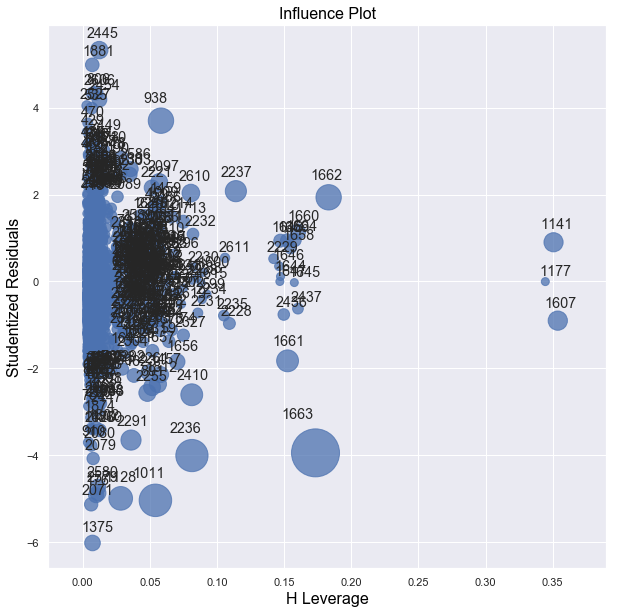

In [81]:
fig,ax=plt.subplots(figsize=(10,10))
#Cook's Distance Plot for base model
fig=sm.graphics.influence_plot(mod1, ax=ax, color='b')
#QQ Plot for log-residual of base model showing deviation from normal distribution
fig = sm.qqplot(df1['residual_log'], fit=True, line='45')
plt.show()

Log-transformation of a skewed quantity will definitely aid in greater degree of normalisation. The residuals of the model with log-transformation shows greater resemblance with a normal distribution. 

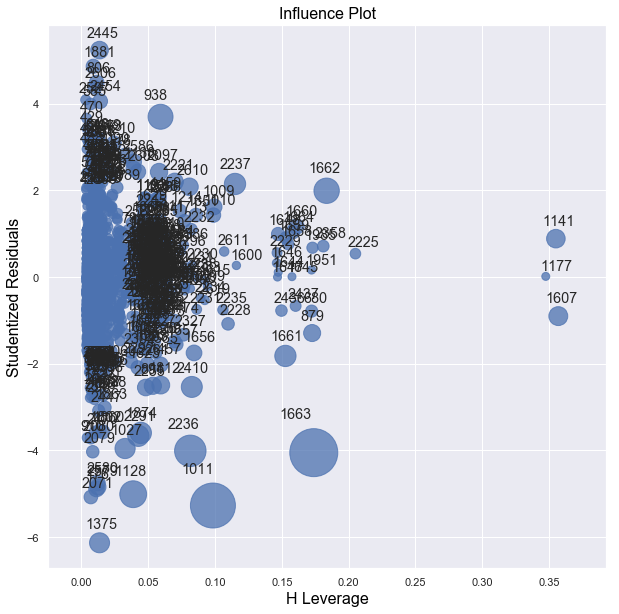

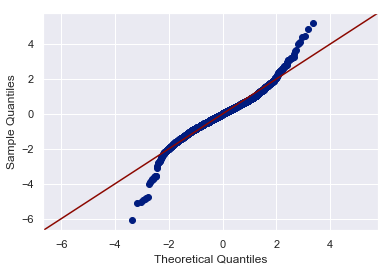

In [82]:
fig,ax=plt.subplots(figsize=(10,10))
#Cook's Distance Plot for first proposed base model
fig=sm.graphics.influence_plot(model, ax=ax, color='b')
#QQ Plot for log-residual of first proposed base model 
fig = sm.qqplot(df1['residual_log_model'], fit=True, line='45')
plt.show()

Therefore, the model 'mod1' will be the base model due to greater degree of normality of its residuals as indicated by qqplot, skewness and kurtosis values in distribution table.

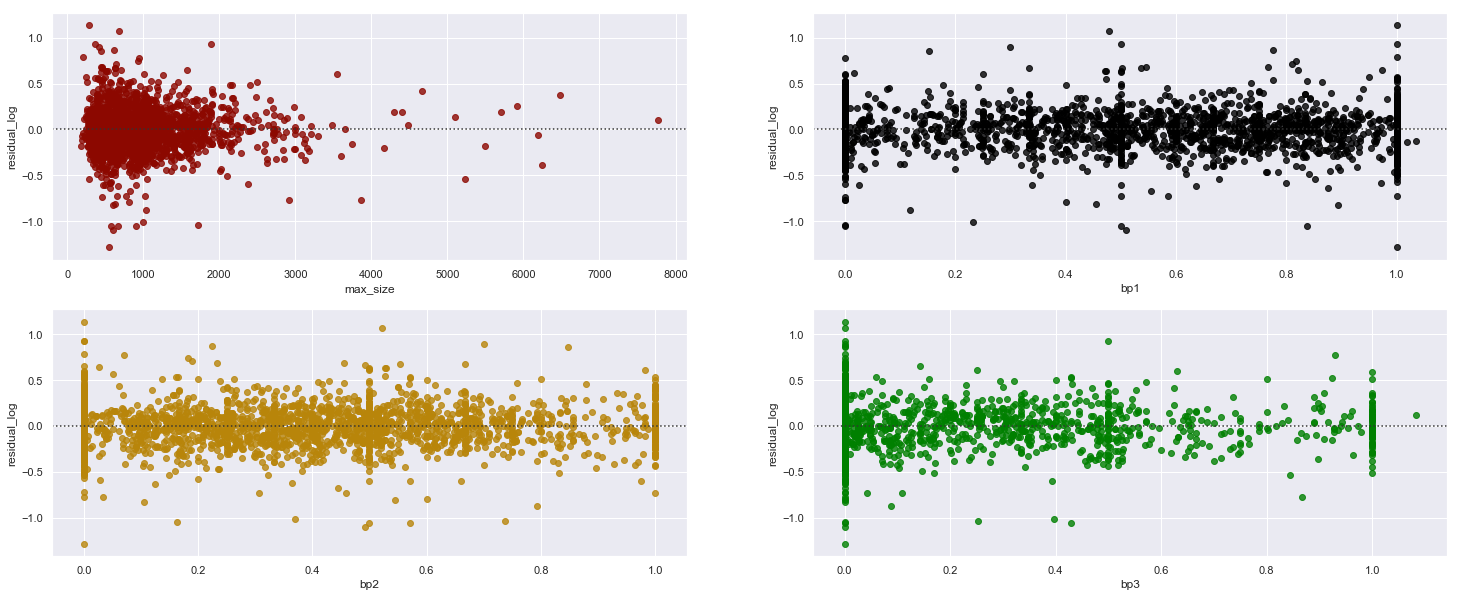

In [83]:
# Residual plots involving continuous variables in based model
f, ax = plt.subplots(2,2 ,figsize=(25,10))
sns.residplot(x="max_size", y='residual_log', data=df1, color="r",ax=ax[0,0])
sns.residplot(x="bp1", y='residual_log', data=df1, color="black",ax=ax[0,1])
sns.residplot(x="bp2", y='residual_log', data=df1, color="y",ax=ax[1,0])
sns.residplot(x="bp3", y='residual_log', data=df1, color="green",ax=ax[1,1])

### 3.2 Base Model Cross Validation

In [84]:
include=['log_wap','max_size','mm_cluster', 'bp1','bp2','bp3', 'unit_type','proj_bedrooms_clean','launch_year']
df1_cv=pd.DataFrame(df1[include])
type_converter (df1_cv, 'mm_cluster', 'category')

df1_cv.head()

log_wap  max_size mm_cluster       bp1       bp2       bp3  unit_type  \
0  9.579418    744.75         14  0.954955  0.045045  0.000000  Apartment   
1  9.545526   1003.30         14  0.000000  0.653333  0.346667  Apartment   
2  9.545526   1003.30         14  0.000000  0.653333  0.346667  Apartment   
3  9.461644    590.51         14  0.891667  0.108333  0.000000  Apartment   
4  9.739884   1717.00         14  0.030303  0.666667  0.303030  Apartment   

  proj_bedrooms_clean launch_year  
0          1 and more        2015  
1          2 and more        2014  
2          2 and more        2014  
3          1 and more        2016  
4          1 and more        2015

In [85]:
from sklearn.preprocessing import OneHotEncoder
#create an instance of one-hot encoding class
onehot_encoder = OneHotEncoder(sparse=False)
colmn=['mm_cluster','unit_type','proj_bedrooms_clean','launch_year']
onehot_encoded = onehot_encoder.fit_transform(df1_cv[colmn])
#Create and concatenate new features formed from one-hot encoding of categorical features
onehot_encoded=pd.DataFrame(onehot_encoded)
df1_cv=pd.concat([df1_cv,onehot_encoded],axis=1)
df1_cv=df1_cv.drop(colmn,axis=1)
df1_cv.head()

log_wap  max_size       bp1       bp2       bp3    0    1    2    3    4  \
0  9.579418    744.75  0.954955  0.045045  0.000000  0.0  0.0  0.0  0.0  0.0   
1  9.545526   1003.30  0.000000  0.653333  0.346667  0.0  0.0  0.0  0.0  0.0   
2  9.545526   1003.30  0.000000  0.653333  0.346667  0.0  0.0  0.0  0.0  0.0   
3  9.461644    590.51  0.891667  0.108333  0.000000  0.0  0.0  0.0  0.0  0.0   
4  9.739884   1717.00  0.030303  0.666667  0.303030  0.0  0.0  0.0  0.0  0.0   

   ...   22   23   24   25   26   27   28   29   30   31  
0  ...  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
2  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
3  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4  ...  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[5 rows x 37 columns]

In [86]:
df1_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 37 columns):
log_wap     2621 non-null float64
max_size    2621 non-null float64
bp1         2621 non-null float64
bp2         2621 non-null float64
bp3         2621 non-null float64
0           2621 non-null float64
1           2621 non-null float64
2           2621 non-null float64
3           2621 non-null float64
4           2621 non-null float64
5           2621 non-null float64
6           2621 non-null float64
7           2621 non-null float64
8           2621 non-null float64
9           2621 non-null float64
10          2621 non-null float64
11          2621 non-null float64
12          2621 non-null float64
13          2621 non-null float64
14          2621 non-null float64
15          2621 non-null float64
16          2621 non-null float64
17          2621 non-null float64
18          2621 non-null float64
19          2621 non-null float64
20          2621 non-null float64
21       

In [87]:
from sklearn.model_selection import train_test_split

target = 'log_wap'
features = df1_cv.columns != target
x = df1_cv.loc[:,features]
y = df1_cv[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1965, 36) (656, 36) (1965,) (656,)


In [88]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train,y_train)
# cross validate
scores_reg = cross_validate(reg, x_train, y_train, cv=8, return_train_score=True,return_estimator=False)
scores_reg =pd.DataFrame(scores_reg)
scores_reg 

fit_time  score_time  test_score  train_score
0  0.010539    0.000000    0.911930     0.926679
1  0.003508    0.000000    0.924548     0.925035
2  0.003507    0.006060    0.933761     0.923626
3  0.004014    0.000000    0.916177     0.926103
4  0.006022    0.000000    0.938199     0.923012
5  0.000000    0.000000    0.917507     0.925926
6  0.006569    0.003512    0.913696     0.926400
7  0.006550    0.000000    0.917492     0.925936

In [89]:
print("Linear Regression Base Model Train Score:",scores_reg ['train_score'].mean())
print("Linear Regression Base Model Test Score:",scores_reg ['test_score'].mean())

Linear Regression Base Model Train Score: 0.9253397563209809
Linear Regression Base Model Test Score: 0.9216637524156409


## 4. Cluster Analysis of Amenities

In [90]:
amenities=df.loc[:,'am_water':'am_water_supply'] # yes-counts of individual amenities
amenities.count().sort_values(ascending=False)

am_closed_carpark     1441
am_lift               1281
am_oth                1230
am_power_backup       1125
am_carpark            1112
am_ls_tree            1082
am_security           1062
am_ls_garden          1059
am_ff_req             1031
am_elec_meter_room    1007
am_water_cons         1003
am_storm_drain         990
am_open_carpark        928
am_jog                 834
am_vaastu              829
am_open_parking        827
am_streetlight         781
am_open_space          775
am_sold_waste          759
am_rain_harvest        758
am_intercom            757
am_energy_mgmt         756
am_maint_staff         725
am_swr_trt_slug        716
am_club                674
am_indoor_games        649
am_commu_building      644
am_swr_chamber         576
am_child_play          546
am_school              532
                      ... 
am_cctv                206
am_ff_system           205
am_swer_trt_plt        124
am_water               112
am_spa                 103
am_amphi               101
a

In [91]:
amenities=amenities.fillna("No")
amenities.head()

am_water am_security am_aerobics am_open_space am_amphi am_atm  \
0       No          No          No            No       No     No   
1       No         Yes          No            No       No     No   
2       No          No          No            No       No     No   
3       No          No          No           Yes       No     No   
4       No         Yes          No            No       No    Yes   

  am_badmintorn am_banquet am_basketball am_business_center  ...  \
0            No         No            No                 No  ...   
1            No         No            No                 No  ...   
2            No         No            No                 No  ...   
3            No         No            No                 No  ...   
4            No         No            No                 No  ...   

  am_storm_drain am_streetlight am_swim am_temple am_tennis am_swr_trt_slug  \
0             No             No      No        No        No              No   
1             No             No      No        No        No              No   
2             No             No      No        No        No              No   
3            Yes            Yes      No        No        No             Yes   
4             No             No      No        No        No              No   

  am_utility_shop am_vaastu am_water_cons am_water_supply  
0              No        No            No              No  
1              No        No            No              No  
2              No        No            No              No  
3              No        No           Yes              No  
4              No       Yes            No              No  

[5 rows x 72 columns]

In [92]:
def label_encoder(dataframe, col_name): # Function for label encoding categorical variables
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    le.fit(dataframe[col_name].unique())
    dataframe[col_name] = le.transform(dataframe[col_name])

In [93]:
for i in list(amenities.columns): # Label-encoding of amenities features
    label_encoder(amenities, i)

In [94]:
amenities['am_water']=amenities['am_water']+amenities['am_water_cons']+amenities['am_water_supply']+amenities['am_rain_harvest']
amenities['am_security']=amenities['am_security']+amenities['am_security_guards']+amenities['am_intercom']+amenities['am_cctv']
amenities['am_outdoor_game']=amenities['am_badmintorn']+amenities['am_basketball']+amenities['am_cric_pitch']+amenities['am_golf']+amenities['am_sports']+amenities['am_tennis']+amenities['am_swim']+amenities['am_jog']
amenities['am_indoor_game']=amenities['am_aerobics']+amenities['am_gym']+amenities['am_skating']+amenities['am_indoor_games']+amenities['am_squash']+amenities['am_spa']
amenities['am_sewage']=amenities['am_swer_trt_plt']+amenities['am_swr_chamber']+amenities['am_sold_waste']+amenities['am_storm_drain']+amenities['am_swr_trt_slug']
amenities['am_roads']=amenities['am_roads']+amenities['am_road_footpath']+amenities['am_streetlight']
amenities['am_cyber']=amenities['am_internet']
amenities['am_power']=amenities['am_energy_mgmt']+amenities['am_elec_meter_room']+amenities['am_ht_alarm']+amenities['am_transformer']+amenities['am_earthquake']+amenities['am_power_backup']
amenities['am_religion']=amenities['am_temple']+amenities['am_vaastu']
amenities['am_space']=amenities['am_ls_garden']+amenities['am_ls_tree']+amenities['am_child_play']+amenities['am_open_space']+amenities['am_amphi']+amenities['am_rec_facility']
amenities['am_finance']=amenities['am_atm']+amenities['am_business_center']
amenities['am_firefighting']=amenities['am_ff_system']+amenities['am_ff_req']
amenities['am_health_related']=amenities['am_health']+amenities['am_hosp']
amenities['am_car_parking']=amenities['am_open_carpark']+amenities['am_open_parking']+amenities['am_closed_carpark']+amenities['am_carpark']
amenities['am_education']=amenities['am_lib']+amenities['am_oth']+amenities['am_school']
amenities['am_maintenance']=amenities['am_maint_staff']+amenities['am_gated']+amenities['am_staffq']
amenities['am_social_gatherings']=amenities['am_commu_building']+amenities['am_commu_hall']+amenities['am_banquet']+amenities['am_party_hall']+amenities['am_club']+amenities['am_multi_room']+amenities['am_cafeteria']
amenities['am_lift']=amenities['am_lift']+amenities['am_service_lift']
amenities['am_shop']=amenities['am_shopmall']+amenities['am_utility_shop']

In [95]:
for i in ['am_water','am_security','am_outdoor_game','am_indoor_game','am_sewage','am_roads','am_cyber','am_power','am_religion','am_space','am_finance','am_firefighting','am_health_related','am_car_parking','am_education','am_maintenance','am_social_gatherings','am_lift','am_shop']:
    amenities[i]=amenities[i].replace([2,3,4,5,6,7],[1,1,1,1,1,1]) # Using OR logic, replace counts of amenities in each 
    # cluster greater than one by 1 to signify if any amenity is present or not
    

In [96]:
for i in list(amenities.columns): # Convert amenities cluster features from integer to categorical
    type_converter (amenities, i, 'category')

In [97]:
df1=pd.concat([df1,amenities],axis=1)
df1.head()

zone micro_market_number developer_number project_number         wap  \
0  Zone A                   1                1              1  14464.0000   
1  Zone A                   1                2              2  13982.0000   
2  Zone A                   1                2              3  13982.0000   
3  Zone A                   1                5              6  12857.0000   
4  Zone A                   1                7              8  16981.5758   

    log_wap proj_bedrooms_clean  unit_type  proj_launched_units launch_year  \
0  9.579418          1 and more  Apartment                  111        2015   
1  9.545526          2 and more  Apartment                  150        2014   
2  9.545526          2 and more  Apartment                  150        2014   
3  9.461644          1 and more  Apartment                  120        2016   
4  9.739884          1 and more  Apartment                   33        2015   

   ... am_religion  am_space  am_finance  am_firefighting  am_health_related  \
0  ...           0         0           0                0                  0   
1  ...           0         1           0                0                  0   
2  ...           0         1           0                0                  0   
3  ...           0         1           0                1                  0   
4  ...           1         1           1                1                  0   

   am_car_parking  am_education  am_maintenance  am_social_gatherings  am_shop  
0               1             0               0                     0        0  
1               1             1               0                     1        0  
2               1             1               0                     1        0  
3               1             0               0                     1        0  
4               1             1               1                     1        0  

[5 rows x 129 columns]

## 5. Analysis of Specifications 

In [98]:
specifications=df.loc[:,'sp_balcony':'sp_cement'] # Yes-counts of specifications
specifications.count().sort_values(ascending=False)

sp_kitchen     1163
sp_toilets     1140
sp_mas_bed     1132
sp_oth_bed     1045
sp_windows      875
sp_main         726
sp_interior     723
sp_exterior     645
sp_internal     621
sp_balcony      597
sp_livdin       372
sp_points       356
sp_wiring       331
sp_switches     165
sp_lobby         58
sp_frame         22
sp_cement         6
dtype: int64

In [99]:
specifications=specifications.fillna('No')
specifications.head()

sp_balcony                                         sp_kitchen  \
0               No                                                 No   
1               No                                    Vitrified Tiles   
2               No                                    Vitrified Tiles   
3               No                                                 No   
4  Vitrified Tiles  Moduler Kitchen with Refrigerator,Vitrified Tiles   

  sp_livdin        sp_mas_bed       sp_oth_bed  \
0        No                No               No   
1        No  Laminated Wooden  Vitrified Tiles   
2        No  Laminated Wooden  Vitrified Tiles   
3        No                No               No   
4        No   Wooden Flooring  Vitrified Tiles   

                                          sp_toilets  \
0                                                 No   
1  Glazed Tiles Dado up to 7 Feet Height Above Pl...   
2  Concealed Plumbing,Glazed Tiles Dado up to 7 F...   
3                                                 No   
4  Branded Sanitary Fittings,Ceramic Tiles Dado u...   

                   sp_internal                               sp_main  \
0                           No                                    No   
1  Veneer Finish Flush Shutter  Teak Veneered / Laminated Flush Door   
2  Veneer Finish Flush Shutter  Teak Veneered / Laminated Flush Door   
3                           No                                    No   
4               Flush Shutters                       Teak Wood Frame   

  sp_interior sp_switches                       sp_windows sp_wiring  \
0          No          No                               No        No   
1          No          No  UPVC Windows with Granite Sills        No   
2          No          No  UPVC Windows with Granite Sills        No   
3          No          No                               No        No   
4          No          No                   French Windows        No   

  sp_exterior sp_frame sp_points sp_lobby sp_cement  
0          No       No        No       No        No  
1          No       No        No       No        No  
2          No       No        No       No        No  
3          No       No        No       No        No  
4          No       No        No       No        No

In [100]:
specifications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 17 columns):
sp_balcony     2621 non-null object
sp_kitchen     2621 non-null object
sp_livdin      2621 non-null object
sp_mas_bed     2621 non-null object
sp_oth_bed     2621 non-null object
sp_toilets     2621 non-null object
sp_internal    2621 non-null object
sp_main        2621 non-null object
sp_interior    2621 non-null object
sp_switches    2621 non-null object
sp_windows     2621 non-null object
sp_wiring      2621 non-null object
sp_exterior    2621 non-null object
sp_frame       2621 non-null object
sp_points      2621 non-null object
sp_lobby       2621 non-null object
sp_cement      2621 non-null object
dtypes: object(17)
memory usage: 348.2+ KB


In [101]:
for i in list(specifications.columns):
    specifications[i]=specifications[i].str.contains('No')

In [102]:
for i in list(specifications.columns):
    label_encoder(specifications, i)
    specifications[i] = specifications[i].replace([0,1],[1,0])

In [103]:
for i in list(specifications.columns):
    type_converter (specifications, i, 'category')

In [104]:
df1=pd.concat([df1,specifications],axis=1)
df1.head()

zone micro_market_number developer_number project_number         wap  \
0  Zone A                   1                1              1  14464.0000   
1  Zone A                   1                2              2  13982.0000   
2  Zone A                   1                2              3  13982.0000   
3  Zone A                   1                5              6  12857.0000   
4  Zone A                   1                7              8  16981.5758   

    log_wap proj_bedrooms_clean  unit_type  proj_launched_units launch_year  \
0  9.579418          1 and more  Apartment                  111        2015   
1  9.545526          2 and more  Apartment                  150        2014   
2  9.545526          2 and more  Apartment                  150        2014   
3  9.461644          1 and more  Apartment                  120        2016   
4  9.739884          1 and more  Apartment                   33        2015   

   ... sp_main  sp_interior  sp_switches  sp_windows  sp_wiring  sp_exterior  \
0  ...       0            0            0           0          0            0   
1  ...       1            0            0           1          0            0   
2  ...       1            0            0           1          0            0   
3  ...       0            0            0           0          0            0   
4  ...       1            0            0           1          0            0   

   sp_frame  sp_points  sp_lobby  sp_cement  
0         0          0         0          0  
1         0          0         0          0  
2         0          0         0          0  
3         0          0         0          0  
4         0          0         0          0  

[5 rows x 146 columns]

## 6. Including in Amenities Clusters & Specifications inside Model

Let's add all the amenities clusters and specifications features to base model and evaluate performance.

In [105]:
mod2 = smf.ols(formula='log_wap ~ max_size + C(mm_cluster) + bp1 + bp2 + bp3 + C(launch_year) + C(proj_bedrooms_clean) + C(unit_type) + C(am_water)+ C(am_security)+ C(am_indoor_game) + C(am_outdoor_game)+ C(am_sewage) + C(am_roads) + C(am_cyber) + C(am_power) + C(am_religion) + C(am_space) + C(am_finance) + C(am_firefighting) + C(am_health_related) + C(am_car_parking) + C(am_education) + C(am_maintenance) + C(am_social_gatherings) + C(am_lift) + C(am_shop) + C(sp_balcony) + C(sp_kitchen) + C(sp_livdin) + C(sp_mas_bed) + C(sp_oth_bed) + C(sp_toilets) + C(sp_internal) + C(sp_main) + C(sp_interior) + C(sp_switches) + C(sp_windows) + C(sp_wiring) + C(sp_exterior) + C(sp_frame) + C(sp_points) + C(sp_lobby) + C(sp_cement)', data=df1).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                log_wap   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     474.5
Date:                Sat, 23 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:09:07   Log-Likelihood:                 368.62
No. Observations:                2621   AIC:                            -599.2
Df Residuals:                    2552   BIC:                            -194.1
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [106]:
residual_log (mod2, df1, 'residual_log_mod2', 'residual_mod2')

median:   0.003769356503498855


(count    2.621000e+03
 mean     1.189595e-11
 std      2.102648e-01
 min     -1.273573e+00
 25%     -1.226169e-01
 50%      3.769357e-03
 75%      1.132604e-01
 max      1.093113e+00
 Name: residual_log_mod2, dtype: float64, None)

In [107]:
percentage_error_projects (df1, 'residual_mod2','percentage_error_mod2', 'percentage_error_interval_mod2')

percentage_error_interval_mod2  project_number  percentage_projects
0                  (-inf, -30.0]             206             7.859596
1                 (-30.0, -20.0]             213             8.126669
2                 (-20.0, -10.0]             363            13.849676
3                   (-10.0, 0.0]             506            19.305609
4                    (0.0, 10.0]             646            24.647081
5                   (10.0, 20.0]             396            15.108737
6                   (20.0, 30.0]             181             6.905761
7                    (30.0, inf]             110             4.196871

In [108]:
# Mean Absolute Percentage Error for model including amenities specifications and amenities
np.absolute(df1['percentage_error_mod2']).mean()

15.765917143758797

In [109]:
fig,ax=plt.subplots(figsize=(10,10))
#Cook's Distance Plot for model including specifications & amenities
fig=sm.graphics.influence_plot(mod2, ax=ax, color='b')
#QQ Plot for absolute residual of model including specifications & amenities
fig = sm.qqplot(df1['residual_log_mod2'], fit=True, line='45')
plt.show()

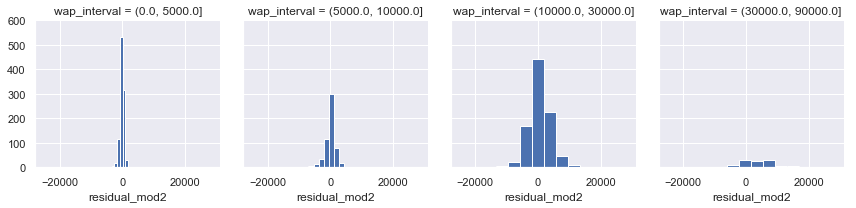

In [110]:
g = sns.FacetGrid(df1, col="wap_interval")
g = g.map(plt.hist, "residual_mod2").set(ylim=(0, 600))

## 7. Dependence Between Base Model Residual with Amenities & Specifications

### 7.1 Chi-Square Test Between Base Model Residual & Amenities & Specifications

A two way chi-square test 

In [111]:
df1['wap_level']=0
df1['residual_abs_level']=df1['residual_abs']=np.absolute(df1['residual'])

df1.loc[df1['wap'] > 20000, 'wap_level']= "High" #Splitting wap into labelled categories
df1.loc[(df1['wap'] >= 4000) & (df1['wap'] <= 20000),'wap_level']= "Medium"
df1.loc[df1['wap'] < 4000, 'wap_level']= "Low"

#Splitting absolute residual values of base model into categories
df1.loc[df1['residual_abs'] > 2500, 'residual_abs_level']= "High" 
df1.loc[(df1['residual_abs'] >= 300) & (df1['residual_abs'] <= 2500),'residual_abs_level']= "Medium"
df1.loc[(df1['residual_abs'] < 300), 'residual_abs_level']= "Low"

Most projects fall under medium category for both prices and residual level.

In [112]:
df1['residual_abs_level'].value_counts()

Medium    1450
Low        620
High       551
Name: residual_abs_level, dtype: int64

In [113]:
df1['wap_level'].value_counts()

Medium    1648
Low        679
High       294
Name: wap_level, dtype: int64

Chi-square test involving amenities clusters and absolute residual level.

In [114]:
print("-----Chi-Square Two-Way P-Values of amenities clusters vs residual of base model-----")
for i in ['am_water','am_security','am_outdoor_game','am_indoor_game','am_sewage','am_roads','am_cyber','am_power','am_religion','am_space','am_finance','am_firefighting','am_health_related','am_car_parking','am_education','am_maintenance','am_social_gatherings','am_lift','am_shop']:
    cont=pd.crosstab(df1['residual_abs_level'],df1[i]) #Contingency table
    g, p, dof, expctd = chi2_contingency(cont)
    print(i,": ", p)

-----Chi-Square Two-Way P-Values of amenities clusters vs residual of base model-----
am_water :  0.01778344391510713
am_security :  0.0008267010332020099
am_outdoor_game :  0.05142357045956863
am_indoor_game :  0.0010481039524558367
am_sewage :  0.3978094628654139
am_roads :  0.12767906081998354
am_cyber :  4.068639757094468e-05
am_power :  0.009864675048453597
am_religion :  0.17410280842837694
am_space :  0.26098811742795247
am_finance :  0.001720315215692861
am_firefighting :  0.20947628056811451
am_health_related :  0.0005546757446423103
am_car_parking :  0.07468694502505059
am_education :  0.0013482204364098618
am_maintenance :  0.009413285530612131
am_social_gatherings :  0.4261572349542244
am_lift :  0.6975407885656709
am_shop :  0.008956028820315418


Chose top 6 clusters with lowest p-values: am_cyber, am_education, am_finance, am_health_related, am_indoor_game, am_security

Now, do a similar chi-square test for specifications.

In [115]:
print("-----Chi-Square Two-Way P-Values of specifications vs residual of base model-----")
for i in list(specifications.columns):
    cont=pd.crosstab(df1['residual_abs_level'],df1[i])
    g, p, dof, expctd = chi2_contingency(cont) # Continency table
    print(i,": ", p)

-----Chi-Square Two-Way P-Values of specifications vs residual of base model-----
sp_balcony :  0.7932805811527844
sp_kitchen :  0.7058160224277901
sp_livdin :  0.03030833390686567
sp_mas_bed :  0.2852148507792724
sp_oth_bed :  0.853179666183508
sp_toilets :  0.26983882958267913
sp_internal :  0.1572282565740447
sp_main :  0.05238370372437968
sp_interior :  0.11800093535152023
sp_switches :  0.09136174689991271
sp_windows :  0.014197209826392
sp_wiring :  0.1569817627181478
sp_exterior :  0.0014400210256040073
sp_frame :  0.017648401822487843
sp_points :  0.009327747300318417
sp_lobby :  0.23388709542300362
sp_cement :  1.24190758898677e-05


At 1% significance level, the following specifications are dependent on base model residuals:

sp_interior, sp_main, sp_exterior, sp_points, sp_cement

Let's reduce the number of amenities and specifications to selected few to the base model.

In [116]:
selected = smf.ols(formula='log_wap ~ max_size + C(mm_cluster) + C(proj_bedrooms_clean) + bp1 + bp2 + bp3 + C(launch_year) + C(unit_type) + C(am_cyber) + C(am_education) + C(am_finance) + C(am_security) + C(am_health_related) + C(am_indoor_game) + C(sp_interior) + C(sp_main) + C(sp_exterior) + C(sp_points) + C(sp_cement)', data=df1).fit()
print(selected.summary())

                            OLS Regression Results                            
Dep. Variable:                log_wap   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     739.7
Date:                Sat, 23 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:09:45   Log-Likelihood:                 339.25
No. Observations:                2621   AIC:                            -590.5
Df Residuals:                    2577   BIC:                            -332.2
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [117]:
residual_log (mod2, df1, 'residual_log_selected', 'residual_selected')

median:   0.003769356503498855


(count    2.621000e+03
 mean     1.189595e-11
 std      2.102648e-01
 min     -1.273573e+00
 25%     -1.226169e-01
 50%      3.769357e-03
 75%      1.132604e-01
 max      1.093113e+00
 Name: residual_log_selected, dtype: float64, None)

In [118]:
percentage_error_projects (df1, 'residual_selected','percentage_error_selected', 'percentage_error_interval_selected')

percentage_error_interval_selected  project_number  percentage_projects
0                      (-inf, -30.0]             206             7.859596
1                     (-30.0, -20.0]             213             8.126669
2                     (-20.0, -10.0]             363            13.849676
3                       (-10.0, 0.0]             506            19.305609
4                        (0.0, 10.0]             646            24.647081
5                       (10.0, 20.0]             396            15.108737
6                       (20.0, 30.0]             181             6.905761
7                        (30.0, inf]             110             4.196871

In [119]:
# Mean Absolute Percentage Error for model with selected amenities specifications and amenities
np.absolute(df1['percentage_error_selected']).mean()

15.765917143758797

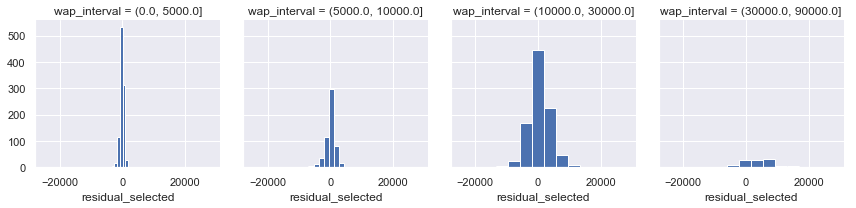

In [120]:
 sns.FacetGrid(df1, col="wap_interval").map(plt.hist, "residual_selected")

It's good that clusters of micromarkets are able to explain price variations.

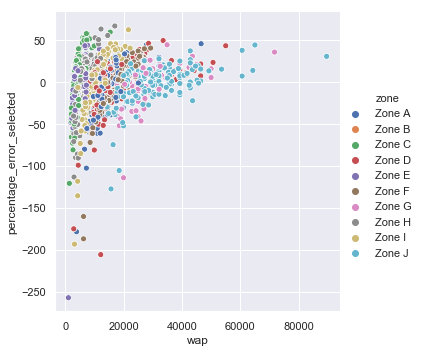

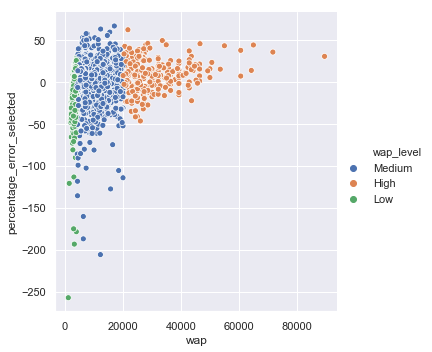

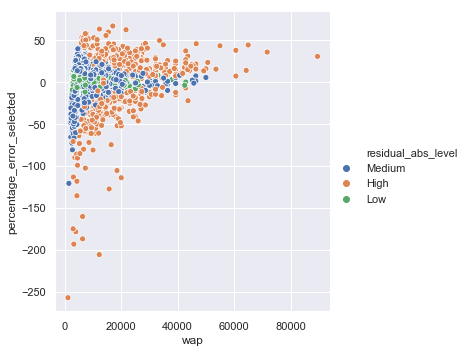

In [121]:
sns.relplot(x="wap", y="percentage_error_selected", hue="zone", data=df1)
sns.relplot(x="wap", y="percentage_error_selected", hue="wap_level", data=df1)
sns.relplot(x="wap", y="percentage_error_selected", hue="residual_abs_level", data=df1)

Large errors in prediction occur in rare instances. Same goes for low errors at high prices.

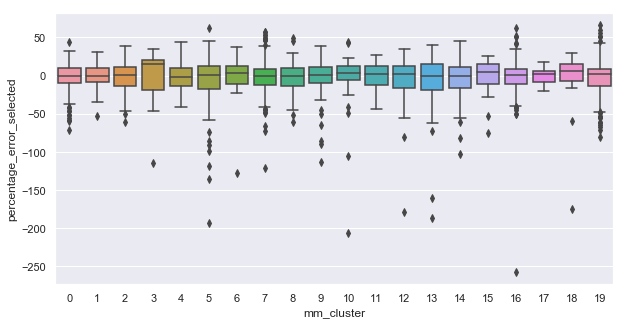

In [122]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="mm_cluster", y="percentage_error_selected", data=df1)

### 7.2  Boxplots of Base Model Residuals & Wap Levels Against Amenities

Let's observe how wap and absolute residual values of base model varies across different categories for different amenities
and specifications. 0 means no amenities are present in an amenity cluster while 1 implies at least one amenity is present in that cluster.

In [123]:
g = sns.catplot(x="am_cyber", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="am_cyber", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

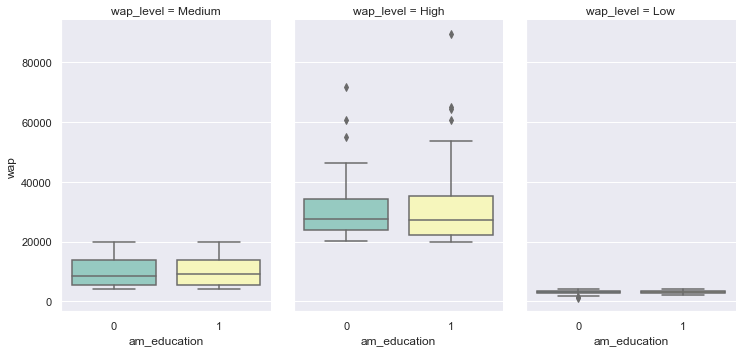

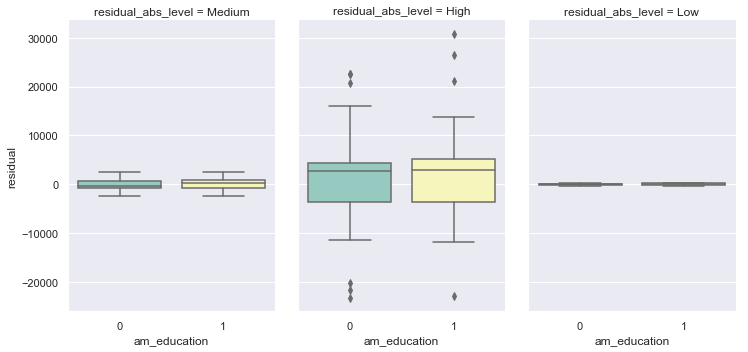

In [124]:
g = sns.catplot(x="am_education", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="am_education", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

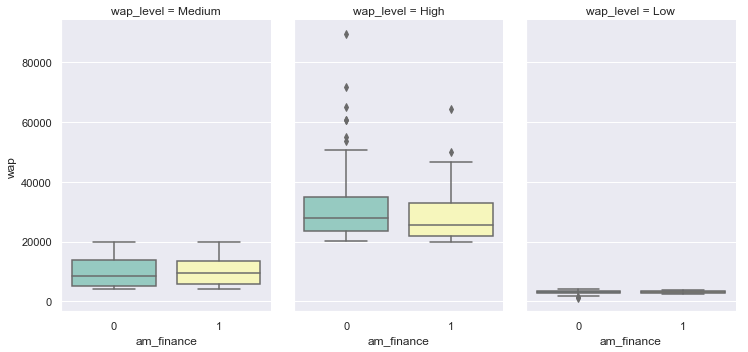

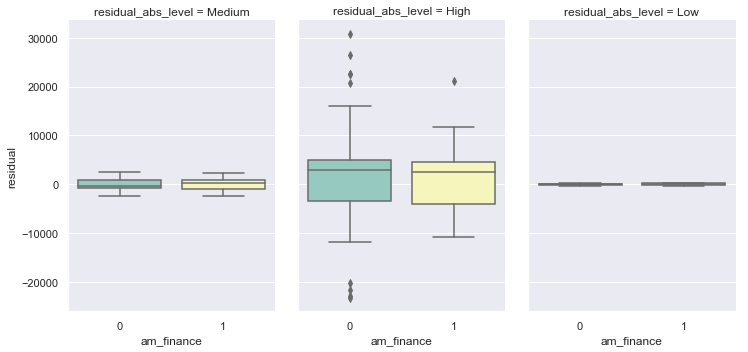

In [125]:
g = sns.catplot(x="am_finance", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="am_finance", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

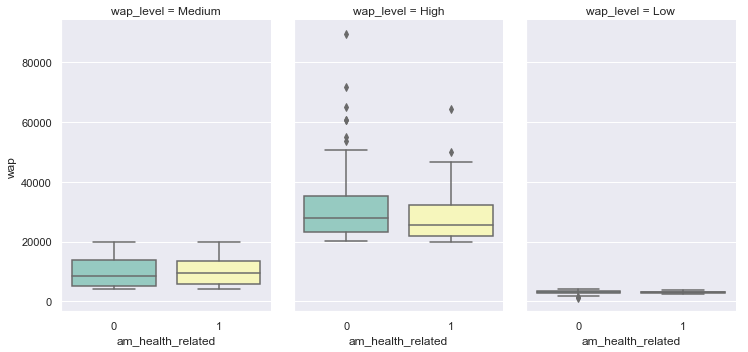

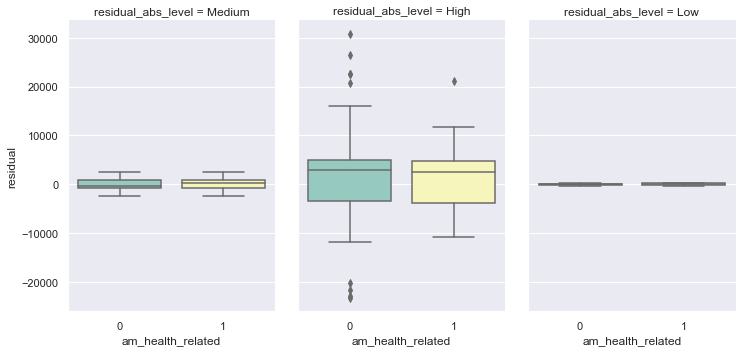

In [126]:
g = sns.catplot(x="am_health_related", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="am_health_related", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

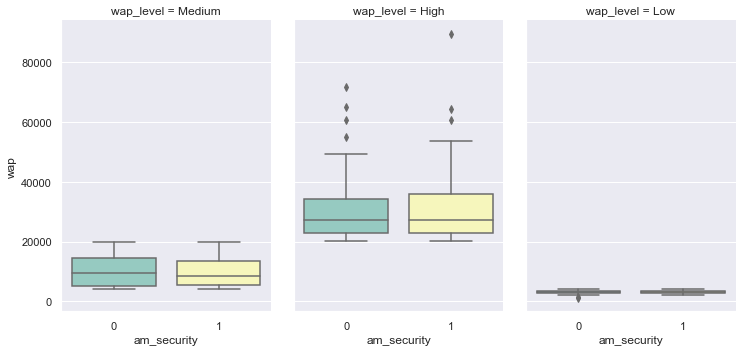

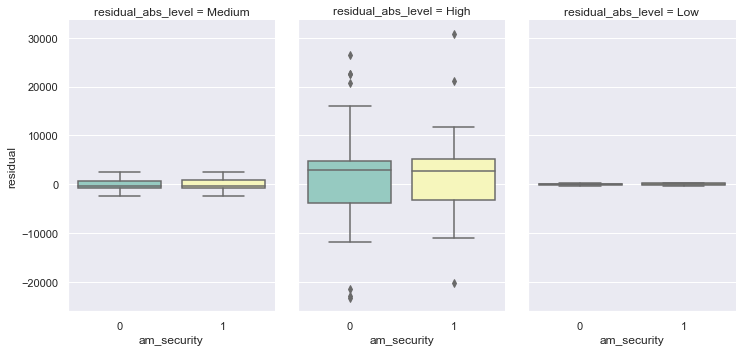

In [127]:
g = sns.catplot(x="am_security", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="am_security", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

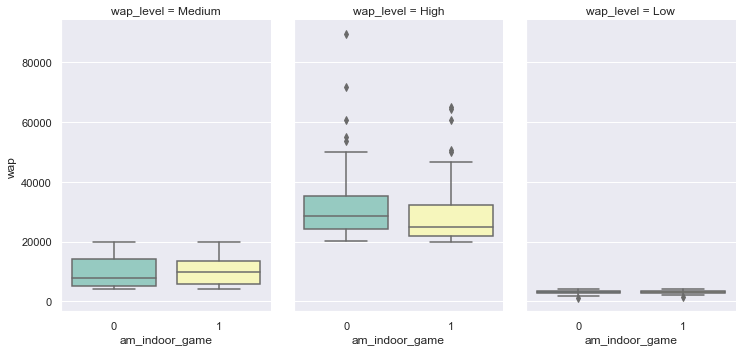

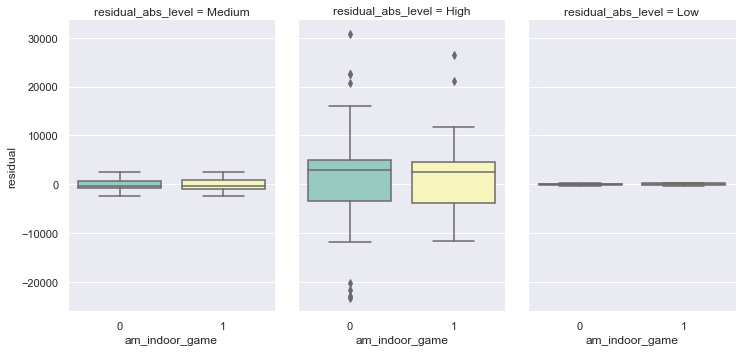

In [128]:
g = sns.catplot(x="am_indoor_game", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="am_indoor_game", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

Weighted average price and price residuals vary the most for amenities falling under high-level category of residuals. 

Amenities with low p-values as shown during chi-square test are showing significant variations in residuals and weighted average prices across different categories.

Weighted average prices are influenced by certain amenities more than others. The presence and absence of specifications also makes a difference to prices.

### 7.3 Boxplots of Base Model Residuals & Wap Levels Against Specifications

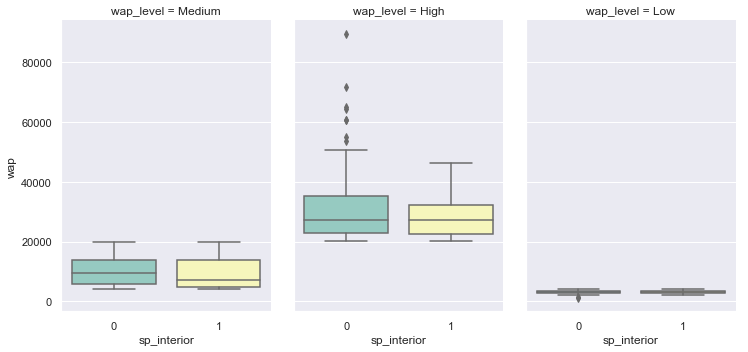

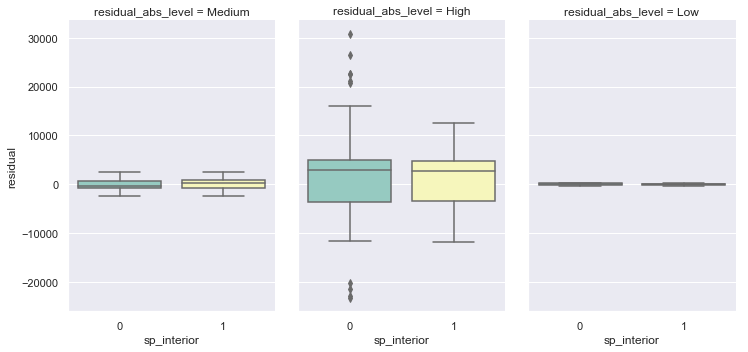

In [129]:
g = sns.catplot(x="sp_interior", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="sp_interior", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

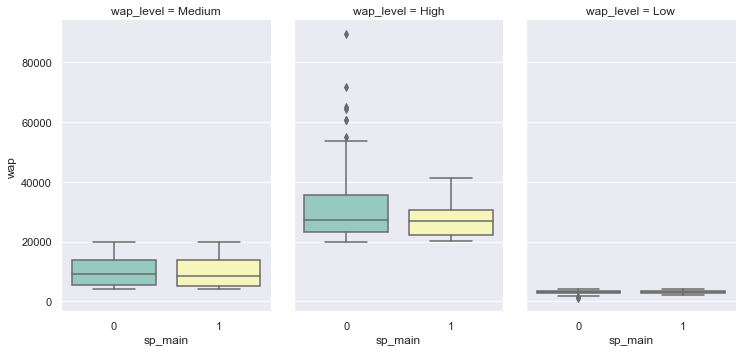

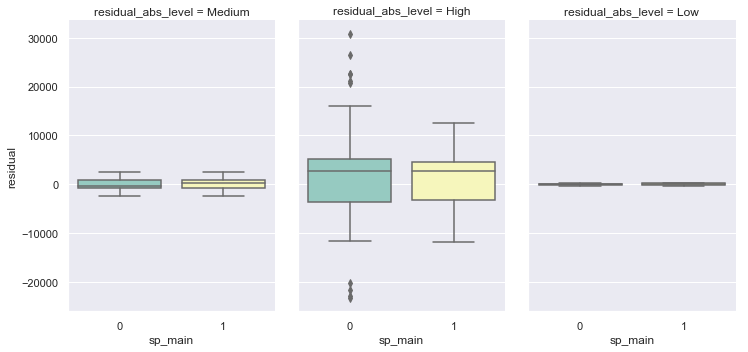

In [130]:
g = sns.catplot(x="sp_main", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="sp_main", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

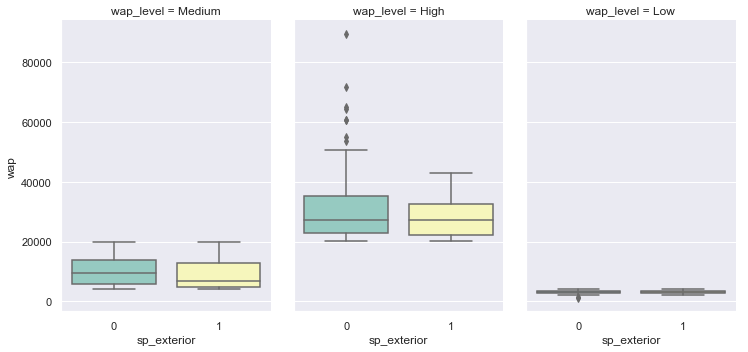

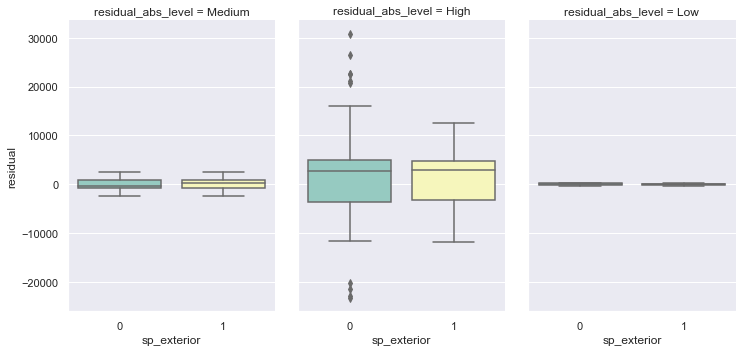

In [131]:
g = sns.catplot(x="sp_exterior", y="wap",col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="sp_exterior", y="residual",col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

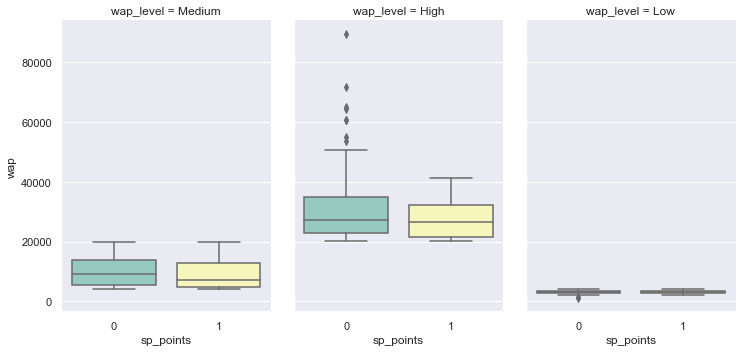

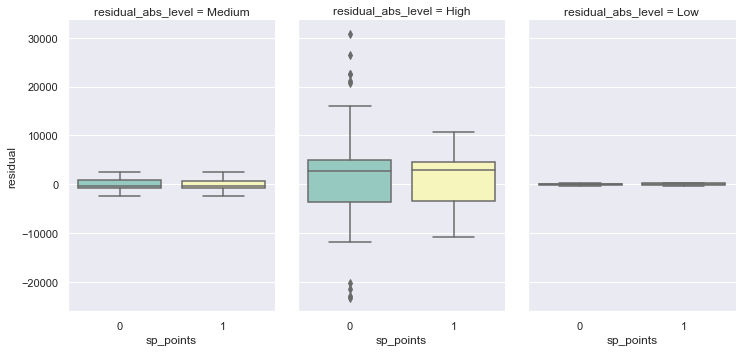

In [132]:
g = sns.catplot(x="sp_points", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="sp_points", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

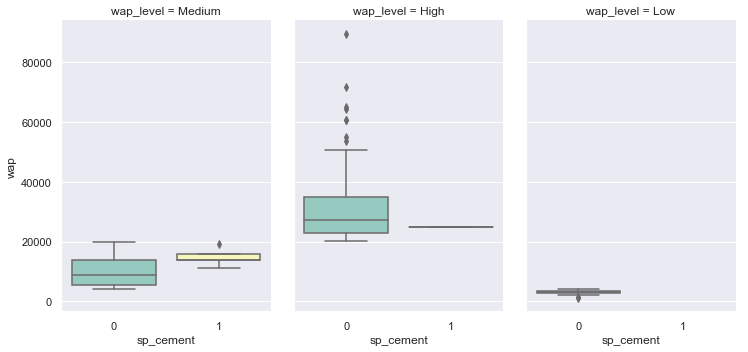

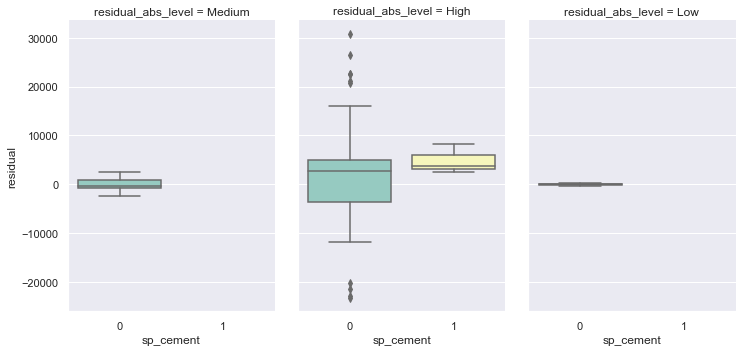

In [133]:
g = sns.catplot(x="sp_cement", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="sp_cement", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

Conclusion: Same as that for amenities. Certain specifications impact project prices more than others as seen from chi-square tests. The presence and absence of specifications also makes a difference to prices.

### 7.4 Seperate Models for High & Low Cutoff Prices

How do model performances vary for high and low prices?

In [134]:
low_cutoff = df1.loc[df1['wap'] <= 10000, :] # Low-Cutoff prices: wap<=10000
high_cutoff = df1.loc[df1['wap'] > 10000, :] # High-Cutoff prices: wap>10000

In [135]:
hc = smf.ols(formula='log_wap ~ max_size + C(mm_cluster) + bp1 + bp2 + bp3 + C(launch_year) + C(proj_bedrooms_clean) + C(unit_type) + C(am_cyber) + C(am_education) + C(am_finance) + C(am_security) + C(am_health_related) + C(am_indoor_game) + C(sp_interior) + C(sp_main) + C(sp_exterior) + C(sp_points) + C(sp_cement)', data=high_cutoff).fit()
print(hc.summary())


                            OLS Regression Results                            
Dep. Variable:                log_wap   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     77.15
Date:                Sat, 23 Mar 2019   Prob (F-statistic):          4.58e-274
Time:                        17:10:01   Log-Likelihood:                 250.98
No. Observations:                1039   AIC:                            -420.0
Df Residuals:                     998   BIC:                            -217.2
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [136]:
residual_log (hc, high_cutoff, 'residual_log_hc', 'residual_hc')

median:   -0.004078577325111965


C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(count    1.039000e+03
 mean     5.532300e-13
 std      1.901361e-01
 min     -1.074905e+00
 25%     -1.160671e-01
 50%     -4.078577e-03
 75%      1.135891e-01
 max      6.649415e-01
 Name: residual_log_hc, dtype: float64, None)

In [137]:
percentage_error_projects (high_cutoff, 'residual_hc','percentage_error_hc', 'percentage_error_interval_hc')

C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


percentage_error_interval_hc  project_number  percentage_projects
0                (-inf, -30.0]              76             7.314726
1               (-30.0, -20.0]              78             7.507218
2               (-20.0, -10.0]             154            14.821944
3                 (-10.0, 0.0]             226            21.751684
4                  (0.0, 10.0]             224            21.559192
5                 (10.0, 20.0]             167            16.073147
6                 (20.0, 30.0]              77             7.410972
7                  (30.0, inf]              37             3.561116

In [138]:
# Mean Absolute Percentage Error for high cut off price model residuals
np.absolute(high_cutoff['percentage_error_hc']).mean()

14.719020811767912

In [139]:
lc = smf.ols(formula='log_wap ~ max_size + C(mm_cluster) + C(proj_bedrooms_clean) + bp1 + bp2 + bp3 + C(launch_year)+ C(unit_type) + C(am_cyber) + C(am_education) + C(am_finance) + C(am_security) + C(am_health_related) + C(am_indoor_game) + C(sp_interior) + C(sp_main) + C(sp_exterior) + C(sp_points) + C(sp_cement)', data=low_cutoff).fit()
print(lc.summary())

                            OLS Regression Results                            
Dep. Variable:                log_wap   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     157.2
Date:                Sat, 23 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:10:02   Log-Likelihood:                 399.45
No. Observations:                1582   AIC:                            -732.9
Df Residuals:                    1549   BIC:                            -555.8
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [140]:
residual_log (lc, low_cutoff, 'residual_log_lc', 'residual_lc') #Residual summary statistics for low cutoff price model

median:   0.00446223583430605


C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(count    1.582000e+03
 mean     1.824835e-12
 std      1.880368e-01
 min     -1.261785e+00
 25%     -9.960900e-02
 50%      4.462236e-03
 75%      1.071780e-01
 max      8.717734e-01
 Name: residual_log_lc, dtype: float64, None)

In [141]:
percentage_error_projects (low_cutoff, 'residual_lc','percentage_error_lc', 'percentage_error_interval_lc')

C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


percentage_error_interval_lc  project_number  percentage_projects
0                (-inf, -30.0]             113             7.142857
1               (-30.0, -20.0]              94             5.941846
2               (-20.0, -10.0]             207            13.084703
3                 (-10.0, 0.0]             361            22.819216
4                  (0.0, 10.0]             404            25.537295
5                 (10.0, 20.0]             267            16.877370
6                 (20.0, 30.0]              98             6.194690
7                  (30.0, inf]              38             2.402023

In [142]:
# Mean Absolute Percentage Error of low cutoff price model residuals
np.absolute(low_cutoff['percentage_error_lc']).mean()

14.093473097774279

The model for low cutoff prices is better in predicting weighted average prices. This shows that low priced projects can be better predicted with lesser errors than higher priced projects.

## 8. Random Forest Regressor 

In [143]:
include=['log_wap','max_size','mm_cluster', 'bp1','bp2','bp3', 'unit_type','proj_bedrooms_clean','launch_year', 'am_security', 'am_indoor_game', 'am_cyber', 'am_finance', 'am_health_related','am_education', 'sp_interior', 'sp_main', 'sp_exterior', 'sp_points','sp_cement']
df2=pd.DataFrame(df1[include])

for i in ['unit_type','proj_bedrooms_clean','launch_year', 'am_security', 'am_indoor_game', 'am_cyber', 'am_finance', 'am_health_related', 'am_education', 'sp_interior', 'sp_main', 'sp_exterior', 'sp_points', 'sp_cement']:
    label_encoder(df2, i)
    type_converter (df2, i, 'int')

df2.head()

log_wap  max_size  mm_cluster       bp1       bp2       bp3  unit_type  \
0  9.579418    744.75          14  0.954955  0.045045  0.000000          0   
1  9.545526   1003.30          14  0.000000  0.653333  0.346667          0   
2  9.545526   1003.30          14  0.000000  0.653333  0.346667          0   
3  9.461644    590.51          14  0.891667  0.108333  0.000000          0   
4  9.739884   1717.00          14  0.030303  0.666667  0.303030          0   

   proj_bedrooms_clean  launch_year  am_security  am_indoor_game  am_cyber  \
0                    0            1            0               0         0   
1                    1            0            1               1         1   
2                    1            0            1               1         1   
3                    0            2            0               0         0   
4                    0            1            1               0         0   

   am_finance  am_health_related  am_education  sp_interior  sp_main  \
0           0                  0             0            0        0   
1           0                  0             1            0        1   
2           0                  0             1            0        1   
3           0                  0             0            0        0   
4           1                  0             1            0        1   

   sp_exterior  sp_points  sp_cement  
0            0          0          0  
1            0          0          0  
2            0          0          0  
3            0          0          0  
4            0          0          0

In [144]:
from sklearn.model_selection import train_test_split

target = 'log_wap'
features = df2.columns != target
x = df2.loc[:,features]
y = df2[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1965, 19) (656, 19) (1965,) (656,)


In [145]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=2000, n_jobs=5, max_depth=12,random_state=4,criterion='mae')
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=5,
           oob_score=False, random_state=4, verbose=0, warm_start=False)

In [146]:
def model_R2 (model,x_testdataframe,y_testdataframe):
    from sklearn.metrics import r2_score
    
    y_pred=model.predict(x_testdataframe)
    return (print("R2 Score -", r2_score(y_testdataframe, y_pred)))

In [147]:
print("Random Forest Regressor:") 
model_R2 (rf, x_test, y_test)

Random Forest Regressor:
R2 Score - 0.9055768534715442


In [148]:
def plot_feature_importances (model, kind, title, color, dataframe):
    importances = pd.Series(data=model.feature_importances_, index= dataframe.columns)
    # Sort importances
    importances_sorted = importances.sort_values()
    # Draw a horizontal barplot of importances_sorted
    importances_sorted.plot(kind=kind, color=color)
    plt.title(title)
    return(plt.show())

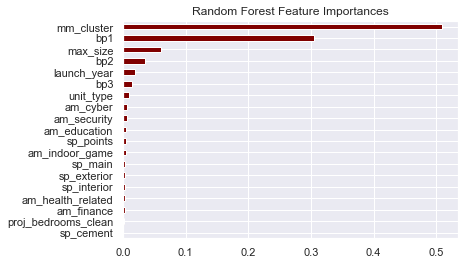

In [149]:
plot_feature_importances (rf, 'barh', 'Random Forest Feature Importances', 'maroon', x_train)

In [150]:
def compute_residual (model, column, dataframe,x_test_df,y_test_df):
    y_pred=model.predict(x_test_df)
    y_pred_wap=np.exp(y_pred)
    y_actual_wap=np.exp(y_test_df)
    y_resid = y_actual_wap - y_pred_wap
    dataframe[column]=pd.DataFrame(y_resid)
    return(dataframe[column].describe())

In [151]:
compute_residual (rf, 'residual_rf', df1, x_test, y_test)

count      656.000000
mean       187.713534
std       3303.261446
min     -24388.084310
25%       -773.859723
50%         -3.051052
75%        928.542791
max      20052.964574
Name: residual_rf, dtype: float64

In [152]:
percentage_error_projects (df1, 'residual_rf', 'percentage_error_rf', 'percentage_error_interval_rf')

percentage_error_interval_rf  project_number  percentage_projects
0                (-inf, -30.0]              69            10.518293
1               (-30.0, -20.0]              42             6.402439
2               (-20.0, -10.0]              78            11.890244
3                 (-10.0, 0.0]             139            21.189024
4                  (0.0, 10.0]             137            20.884146
5                 (10.0, 20.0]             110            16.768293
6                 (20.0, 30.0]              49             7.469512
7                  (30.0, inf]              32             4.878049

In [153]:
# Mean Absolute Percentage Error for Random Forest Regressor
print('MAPE of Random Forest Regressor:', np.absolute(df1['percentage_error_rf']).mean())

MAPE of Random Forest Regressor: 17.343812398929238


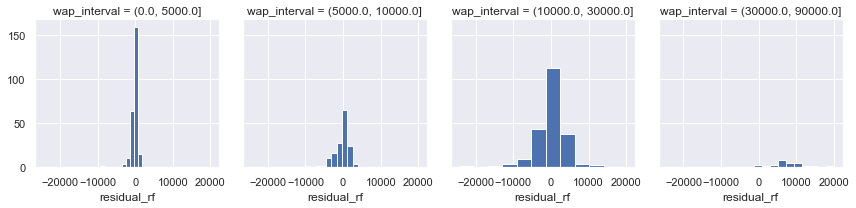

In [154]:
sns.FacetGrid(df1, col="wap_interval",margin_titles=True).map(plt.hist, "residual_rf")

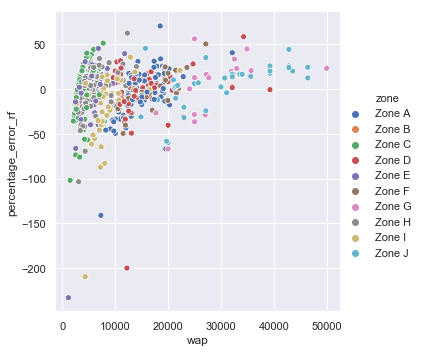

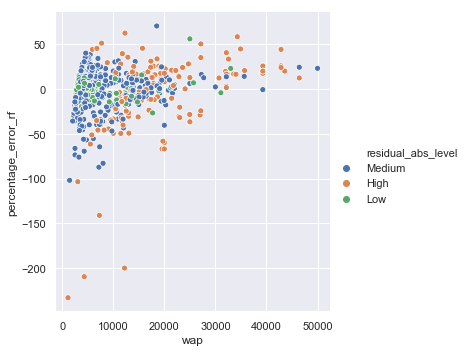

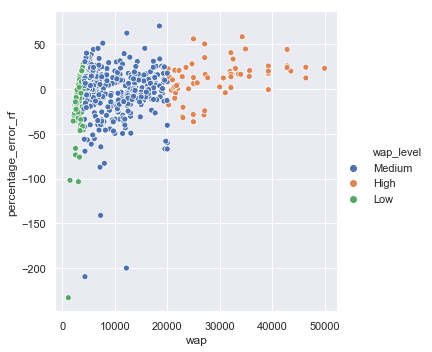

In [155]:
sns.relplot(x="wap", y="percentage_error_rf", hue="zone", data=df1)
sns.relplot(x="wap", y="percentage_error_rf", hue="residual_abs_level", data=df1)
sns.relplot(x="wap", y="percentage_error_rf", hue="wap_level", data=df1)

Errors are concentrated at smaller levels regardless of the categories they belong to. Due to relatively higher level of residuals, scatter plots each category are widely spread out compared to linear regression plot.

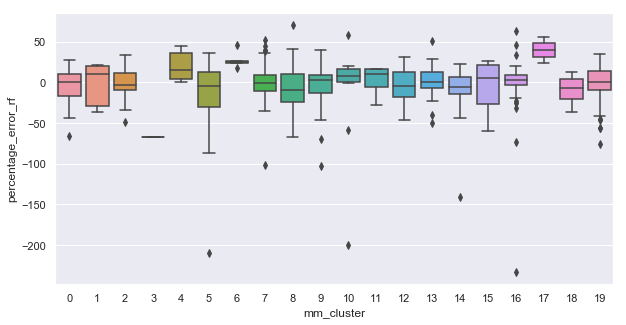

In [156]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="mm_cluster", y="percentage_error_rf", data=df1)

The Random Forest regressor model is performing even more poorly, indicating greater degree of residuals.
Percentage residual is starting to show greater variance across clusters.

## 9. Extreme Gradient Boost Regressor

In [157]:
from xgboost import XGBRegressor

xg_reg=XGBRegressor(objective='reg:linear', n_estimators=170, learning_rate=0.1, seed=100,base_score=0.1,reg_alpha=0.4,reg_lambda=0.3)
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=0.1, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=170,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.4, reg_lambda=0.3, scale_pos_weight=1, seed=100,
       silent=True, subsample=1)

In [158]:
from sklearn.model_selection import cross_validate

# cross validate
scores_xgreg = cross_validate(xg_reg, x_train, y_train, cv=8, return_train_score=True,return_estimator=False)
scores_xgreg =pd.DataFrame(scores_xgreg )
scores_xgreg 

fit_time  score_time  test_score  train_score
0  0.163253    0.000000    0.901740     0.935292
1  0.155171    0.005070    0.890328     0.933267
2  0.151757    0.000000    0.911410     0.932929
3  0.146007    0.010052    0.902725     0.933751
4  0.156549    0.003577    0.916310     0.931015
5  0.154723    0.000000    0.891310     0.934767
6  0.155935    0.003507    0.905405     0.934007
7  0.150142    0.000000    0.898170     0.932439

In [159]:
print('Mean Test Score for XG Boost Regressor: ', scores_xgreg ['test_score'].mean())
print('Mean Train Score for XG Boost Regressor: ', scores_xgreg ['train_score'].mean())

Mean Test Score for XG Boost Regressor:  0.9021747970805712
Mean Train Score for XG Boost Regressor:  0.9334332779316071


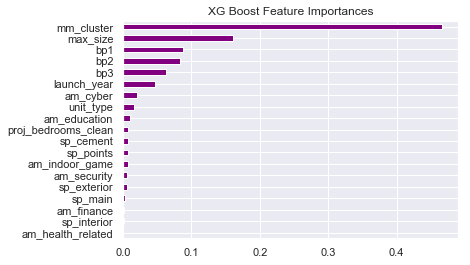

In [160]:
plot_feature_importances (xg_reg, 'barh', 'XG Boost Feature Importances', 'purple', x_train)

Just like random forest, micromarket cluster remains the favourite feature while max_size and bedroom by typologies continue to top the list as well. Feature map tells us different importance of predictor variables being considered.

In [161]:
print("XGBoost Regressor:") 
model_R2 (xg_reg, x_test, y_test)

XGBoost Regressor:
R2 Score - 0.9031252358917817


In [162]:
compute_residual (xg_reg, 'residual_xgreg', df1, x_test, y_test)

count      656.000000
mean       383.050884
std       3577.695054
min     -25620.550612
25%       -872.434570
50%          0.313540
75%        885.323364
max      19528.755859
Name: residual_xgreg, dtype: float64

In [163]:
percentage_error_projects (df1, 'residual_xgreg', 'percentage_error_xgreg', 'percentage_error_interval_xgreg')

percentage_error_interval_xgreg  project_number  percentage_projects
0                   (-inf, -30.0]              71            10.823171
1                  (-30.0, -20.0]              54             8.231707
2                  (-20.0, -10.0]              90            13.719512
3                    (-10.0, 0.0]             113            17.225610
4                     (0.0, 10.0]             148            22.560976
5                    (10.0, 20.0]              94            14.329268
6                    (20.0, 30.0]              44             6.707317
7                     (30.0, inf]              42             6.402439

In [164]:
# Mean Absolute Percentage Error for Extreme Gradient Boost Regressor
print('MAPE of Gradient Boost Regressor:', np.absolute(df1['percentage_error_xgreg']).mean())

MAPE of Gradient Boost Regressor: 17.924616492765256


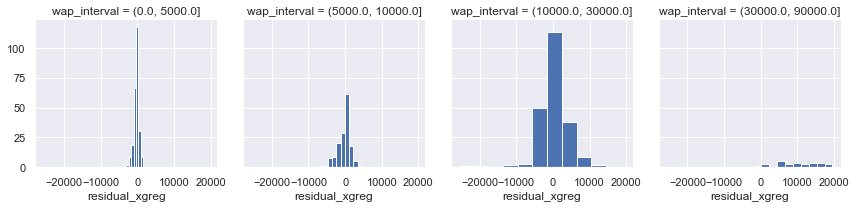

In [165]:
sns.FacetGrid(df1, col="wap_interval",margin_titles=True).map(plt.hist, "residual_xgreg")

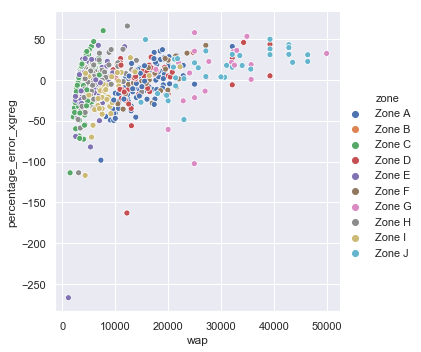

In [166]:
sns.relplot(x="wap", y="percentage_error_xgreg", hue="zone", data=df1)
sns.relplot(x="wap", y="percentage_error_xgreg", hue="wap_level", data=df1)
sns.relplot(x="wap", y="percentage_error_xgreg", hue="residual_abs_level", data=df1)

Compared to Random Forest, errors are lower overall for XGBoost Regressor. However, it is unable to beat multiple linear regression model.

In [167]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="mm_cluster", y="percentage_error_xgreg", data=df1)

### 10. Extreme Gradient Boost Regressor Using All Features

In [168]:
include=['log_wap','max_size','min_size','mm_cluster','bp1','bp2','bp3','bp4','bp5','bp6','bp7','bp8','b1','b2','b3','b4','b5','b6','b7','b8','unit_type','construction_status','proj_bedrooms_clean','launch_year']
amen=['am_water','am_security','am_indoor_game','am_outdoor_game','am_sewage','am_roads','am_cyber','am_power','am_religion','am_space','am_finance','am_firefighting','am_health_related','am_car_parking','am_education','am_maintenance','am_social_gatherings','am_lift','am_shop']
df3=pd.concat([df1[include],df1[amen],specifications],axis=1)

for i in list(df3.columns)[20:]:
    label_encoder(df3, i)
    type_converter (df3, i, 'int')
    
df3.head()

log_wap  max_size  min_size  mm_cluster       bp1       bp2       bp3  \
0  9.579418    744.75    312.48          14  0.954955  0.045045  0.000000   
1  9.545526   1003.30    730.87          14  0.000000  0.653333  0.346667   
2  9.545526   1003.30    730.87          14  0.000000  0.653333  0.346667   
3  9.461644    590.51    269.96          14  0.891667  0.108333  0.000000   
4  9.739884   1717.00    681.57          14  0.030303  0.666667  0.303030   

   bp4  bp5  bp6  ...  sp_main  sp_interior  sp_switches  sp_windows  \
0  0.0  0.0  0.0  ...        0            0            0           0   
1  0.0  0.0  0.0  ...        1            0            0           1   
2  0.0  0.0  0.0  ...        1            0            0           1   
3  0.0  0.0  0.0  ...        0            0            0           0   
4  0.0  0.0  0.0  ...        1            0            0           1   

   sp_wiring  sp_exterior  sp_frame  sp_points  sp_lobby  sp_cement  
0          0            0         0          0         0          0  
1          0            0         0          0         0          0  
2          0            0         0          0         0          0  
3          0            0         0          0         0          0  
4          0            0         0          0         0          0  

[5 rows x 60 columns]

In [169]:
dependent = 'log_wap'
independent = df3.columns != dependent
x1 = df3.loc[:,independent]
y1 = df3[dependent]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=8) # Split into train and test dataset

xg_reg_all=XGBRegressor(objective='reg:linear', n_estimators=200, learning_rate=0.095, seed=100,base_score=0,reg_alpha=0.3)
xg_reg_all.fit(x1_train, y1_train) # Fit Extreme Gradient Boost Regressor into  training data

XGBRegressor(base_score=0, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.095, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=100,
       silent=True, subsample=1)

In [170]:
# cross validate
scores_xgreg_all = cross_validate(xg_reg_all, x1_train, y1_train, cv=8, return_train_score=True,return_estimator=False)
scores_xgreg_all = pd.DataFrame(scores_xgreg_all)
scores_xgreg_all 

fit_time  score_time  test_score  train_score
0  0.399879    0.009916    0.900799     0.940832
1  0.403448    0.000000    0.876589     0.940362
2  0.390366    0.010084    0.899882     0.941597
3  0.389875    0.006096    0.900578     0.939193
4  0.396204    0.004020    0.917269     0.938721
5  0.393737    0.006092    0.889711     0.941518
6  0.397255    0.002073    0.900347     0.940867
7  0.399403    0.006095    0.900485     0.941096

In [171]:
print('Mean Test Score for XG Boost Regressor using all features: ', scores_xgreg_all ['test_score'].mean())
print('Mean Train Score for XG Boost Regressor using all features: ', scores_xgreg_all ['train_score'].mean())

Mean Test Score for XG Boost Regressor using all features:  0.8982075763280317
Mean Train Score for XG Boost Regressor using all features:  0.9405233913480326


In [172]:
print("XGBoost Regressor for all features:") 
model_R2 (xg_reg_all, x1_test, y1_test)

XGBoost Regressor for all features:
R2 Score - 0.8924345333775229


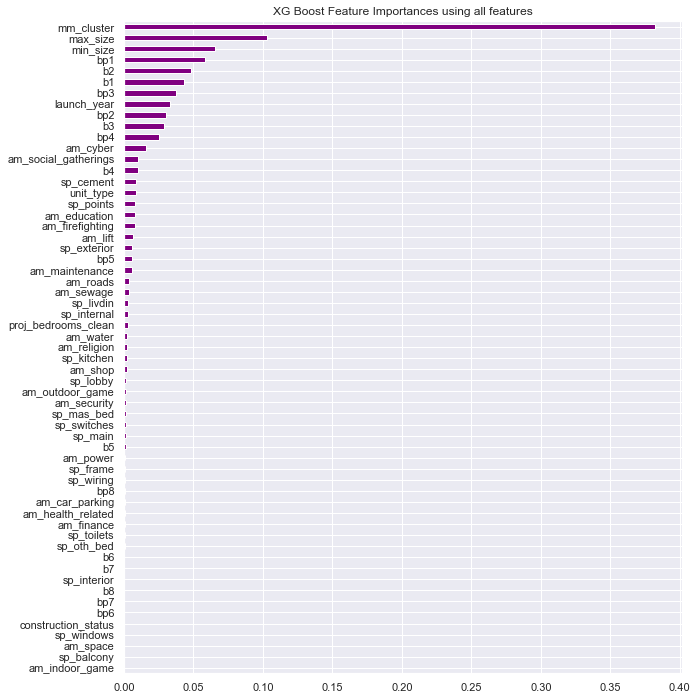

In [173]:
fig,ax=plt.subplots(figsize=(10,12))
fig=plot_feature_importances (xg_reg_all, 'barh', 'XG Boost Feature Importances using all features', 'purple', x1_train)

Not all features are important to the XG Boost Regressor model. Most of the features in amenities and specifications were not even considered.

In [174]:
compute_residual (xg_reg_all, 'residual_xgreg_all', df1, x1_test, y1_test)

count      656.000000
mean       337.939508
std       3768.393182
min     -23398.027344
25%       -872.937378
50%        -16.634033
75%        898.122200
max      21479.750000
Name: residual_xgreg_all, dtype: float64

In [175]:
# Error Distribution for Extreme Gradient Boost Regressor using all features
percentage_error_projects (df1, 'residual_xgreg_all', 'percentage_error_xgreg_all', 'percentage_error_interval_xgreg_all')

percentage_error_interval_xgreg_all  project_number  percentage_projects
0                       (-inf, -30.0]              77            11.737805
1                      (-30.0, -20.0]              63             9.603659
2                      (-20.0, -10.0]              79            12.042683
3                        (-10.0, 0.0]             116            17.682927
4                         (0.0, 10.0]             131            19.969512
5                        (10.0, 20.0]             110            16.768293
6                        (20.0, 30.0]              43             6.554878
7                         (30.0, inf]              37             5.640244

In [176]:
# Mean Absolute Percentage Error for Extreme Gradient Boost Regressor using all features
print('MAPE of XGBoost Regressor using all features:', np.absolute(df1['percentage_error_xgreg_all']).mean())

MAPE of XGBoost Regressor using all features: 18.980673729640184


Errors are slightly higher when all the models are fed to the XG Boost Regressor model.

In [177]:
sns.FacetGrid(df1, col="wap_interval",margin_titles=True).map(plt.hist, "residual_xgreg_all")

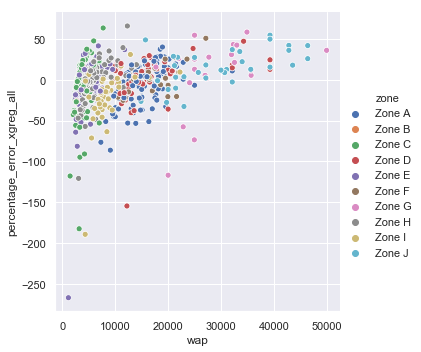

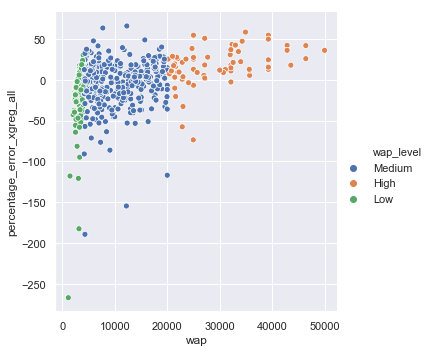

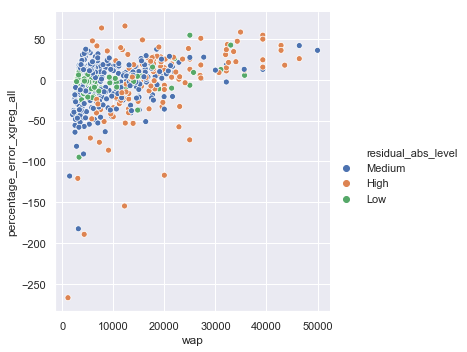

In [178]:
sns.relplot(x="wap", y="percentage_error_xgreg_all", hue="zone", data=df1)
sns.relplot(x="wap", y="percentage_error_xgreg_all", hue="wap_level", data=df1)
sns.relplot(x="wap", y="percentage_error_xgreg_all", hue="residual_abs_level", data=df1)

Errors slightly larger than XG Boost model with selected amenities and specifications. Thus, it is important to be selective about the features we feed that can be good predictors.

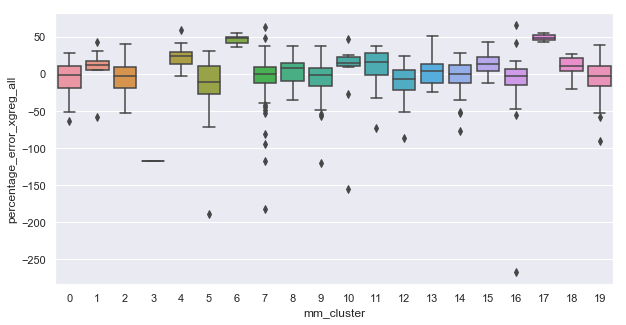

In [179]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="mm_cluster", y="percentage_error_xgreg_all", data=df1)